# Customer Churn Analysis

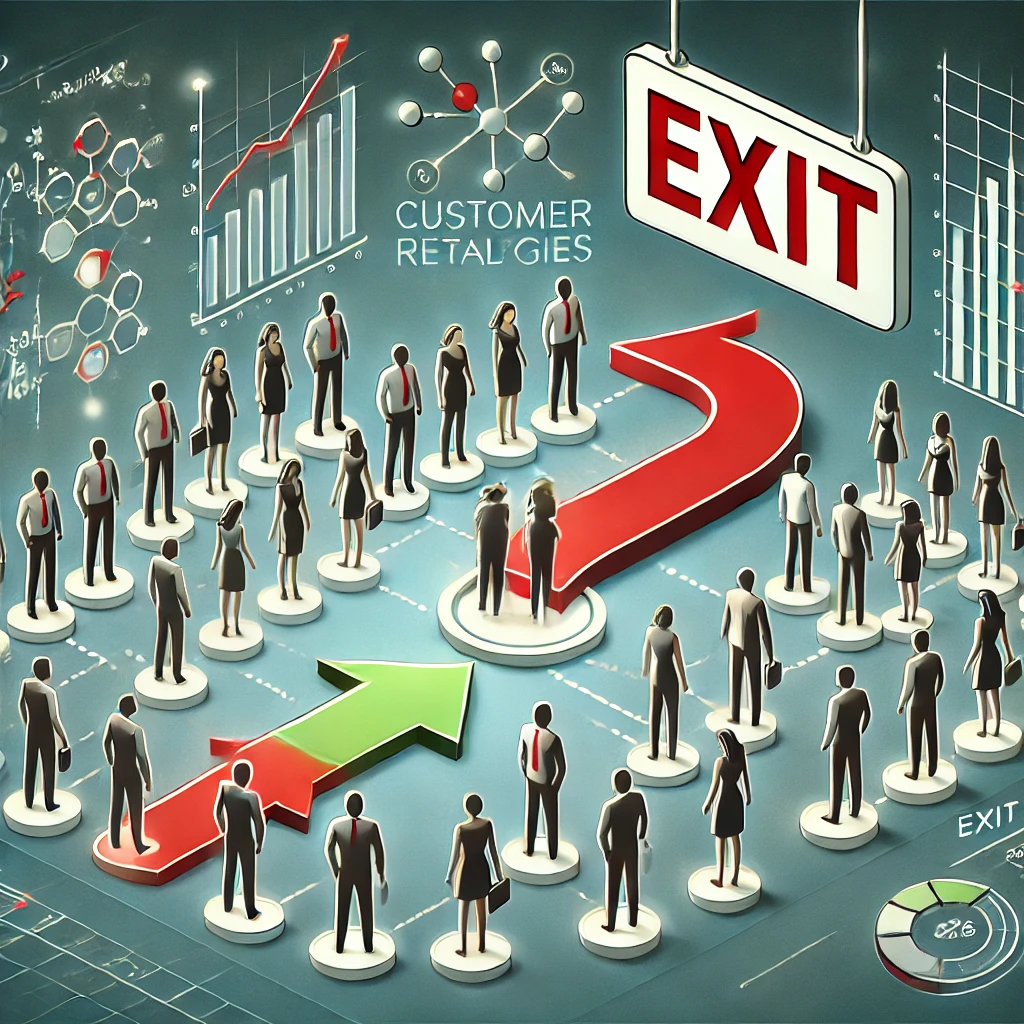


In [ ]:
#![image.png](attachment:image.png)
#<img src="attachment:image.png" alt="image" style="width:600px;height:500px;">

## Problem Statement

The primary objective of this analysis is to predict customers who are likely to churn for a telecommunications company and understand the factors that contribute to customer churn. Customer churn refers to the customers who stop using the company's services within a given time period. By accurately predicting churn, the company can implement retention strategies to retain customers, thereby reducing revenue loss.

Objectives:

   - Develop a predictive model to identify customers who are likely to churn.
   - Analyze the key factors influencing customer churn to provide actionable insights for retention strategies.

## The Target Variable

The target variable for this analysis is Churn, which is a binary indicator of whether a customer has discontinued their service. It typically takes two values:

Yes: The customer has churned.
No: The customer has not churned.

## Attributes

### Relevant Features


Demographic Information:

gender: Indicates the gender of the customer.

SeniorCitizen: Indicates if the customer is a senior citizen or not.

Partner: Indicates if the customer has a partner or not.

Dependents: Indicates if the customer has dependents ot not.

Account Information:

tenure: The number of months the customer has been with the company.

Contract: The type of contract the customer has with the company. (month-to-month, one year, two year).


MonthlyCharges: The amount charged to the customer monthly.

TotalCharges: The total amount charged to the customer.


Service Usage:

PhoneService: Indicates if the customer has a phone service.

InternetService: The type of internet service the customer has (e.g., DSL, Fiber optic, No).

OnlineSecurity: Indicates if the customer has online security.

OnlineBackup: Indicates if the customer has online backup.

DeviceProtection: Indicates if the customer has device protection.

TechSupport: Indicates if the customer has tech support.

## Introducing the Dataset

In [2]:
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
missing_values = ['', ' ', 'N/A', 'Unknown', '?'] 
df1 = pd.read_csv("C:\\Users\\Srinidhi\\Downloads\\S20210020323_SRINIDHI_PDS_PROJECT\\WA_Fn-UseC_-Telco-Customer-Churn (1).csv", na_values=missing_values)
df1.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

This dataset will be used to build a predictive model for customer churn analysis. By analyzing the attributes and their relationship with the target variable (Churn), we aim to identify patterns and factors that contribute to churn. The insights gained will help in developing strategies to retain customers and reduce churn rates.

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df1.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

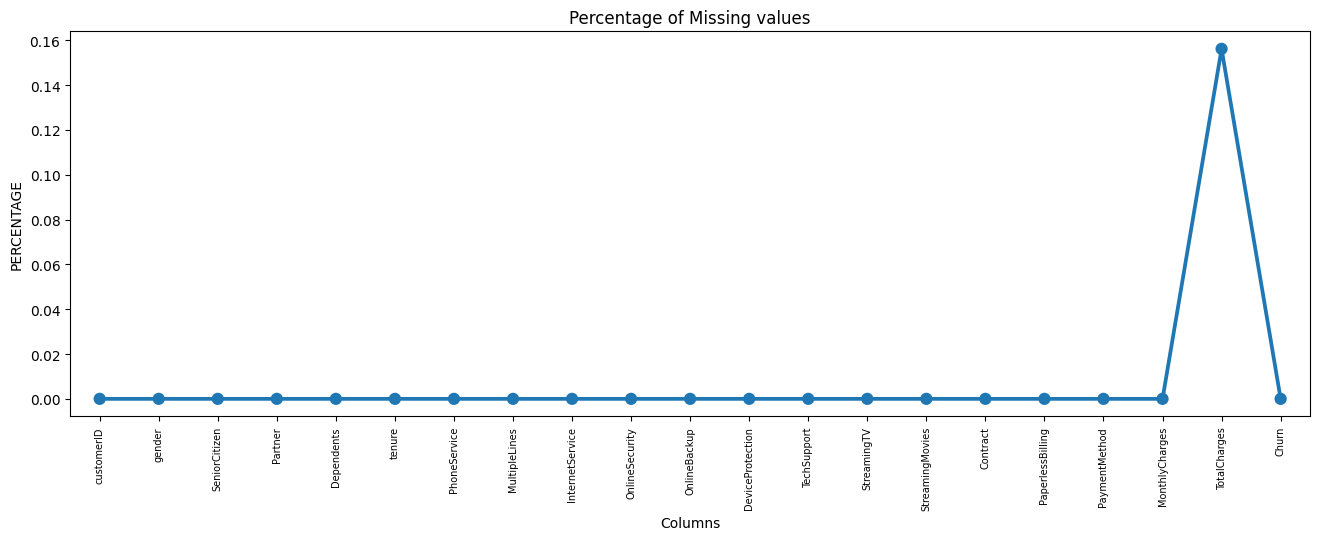

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

missing = pd.DataFrame((df1.isnull().sum()) * 100 / df1.shape[0]).reset_index()
missing.columns = ['Column', 'Percentage']

# Plot the percentage of missing values
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='Column', y='Percentage', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.xlabel("Columns")
plt.show()

In [7]:
df1["Churn"].value_counts()


Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [8]:
5174/(5174 + 1869)

0.7346301292063041

only 27% has churned, so 73% did not churn - class imbalance problem, have to balance the class for the training data to get a better performing ml model.

## Data Cleaning

In [9]:
df1.replace(missing_values, pd.NA, inplace=True)
df1['TotalCharges'].fillna(0, inplace=True)

C:\Users\Srinidhi\AppData\Local\Temp\ipykernel_20408\1333019216.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['TotalCharges'].fillna(0, inplace=True)


All the missing values from the totalCharges, have been replaced with 0

In [10]:
df1.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df1['TotalCharges'].min()

0.0

In [12]:
df1['SeniorCitizen'] = df1['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})

print(df1['SeniorCitizen'].value_counts())

SeniorCitizen
No     5901
Yes    1142
Name: count, dtype: int64


changing senior citizens variable from int to object for convenience

## Data Visualisation of Important features

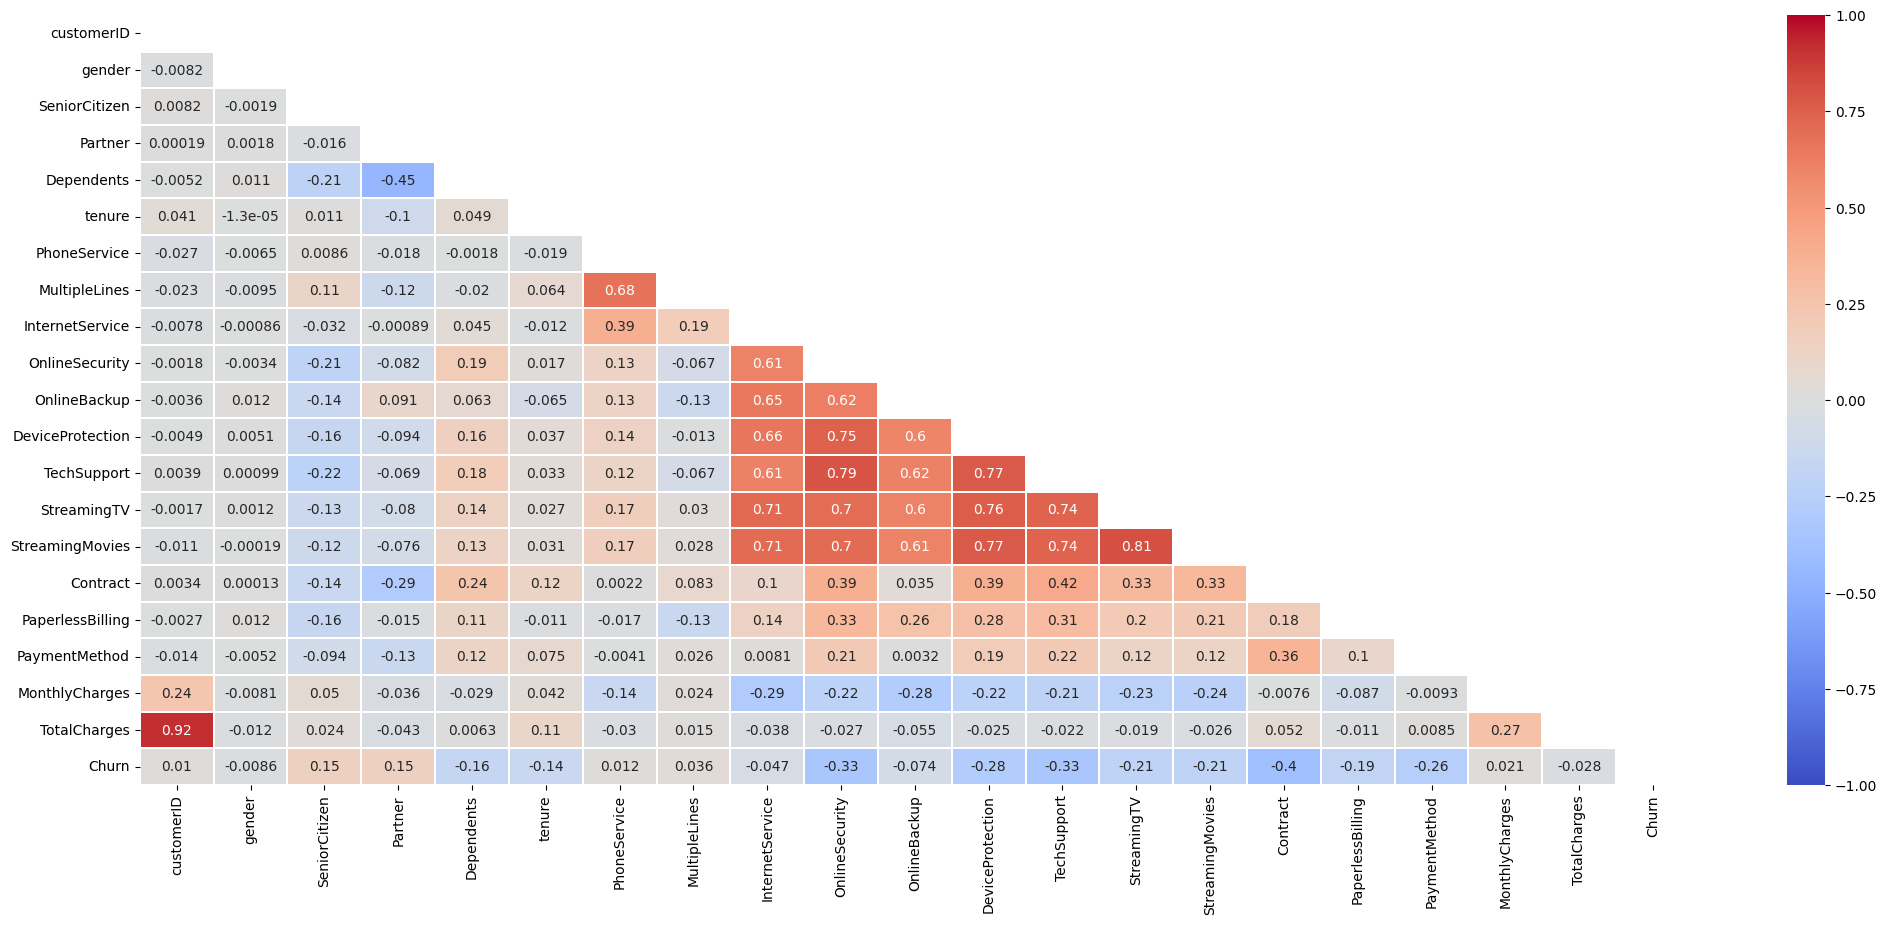

In [129]:
plt.figure(figsize=(25, 10))

corr = df1.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

We can observe that streaming tv, streaming movies and internet services are highly correlated with each other, indicating that customers who subscribe to one of these services are likely to subscribe to others as well. So we are retaining internet service and removing the other two.

As InternetService is a core service that all customers must have to subscribe to StreamingTV or StreamingMovies, it might be important to retain InternetService as it represents a foundational aspect of the customer relationship.

### 1. For Categorical Features

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
imp_features =  ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                        'TechSupport', 'Contract', 'MonthlyCharges', 'TotalCharges','Churn']


categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                        'TechSupport', 'Contract','Churn']


cat_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                        'TechSupport', 'Contract']

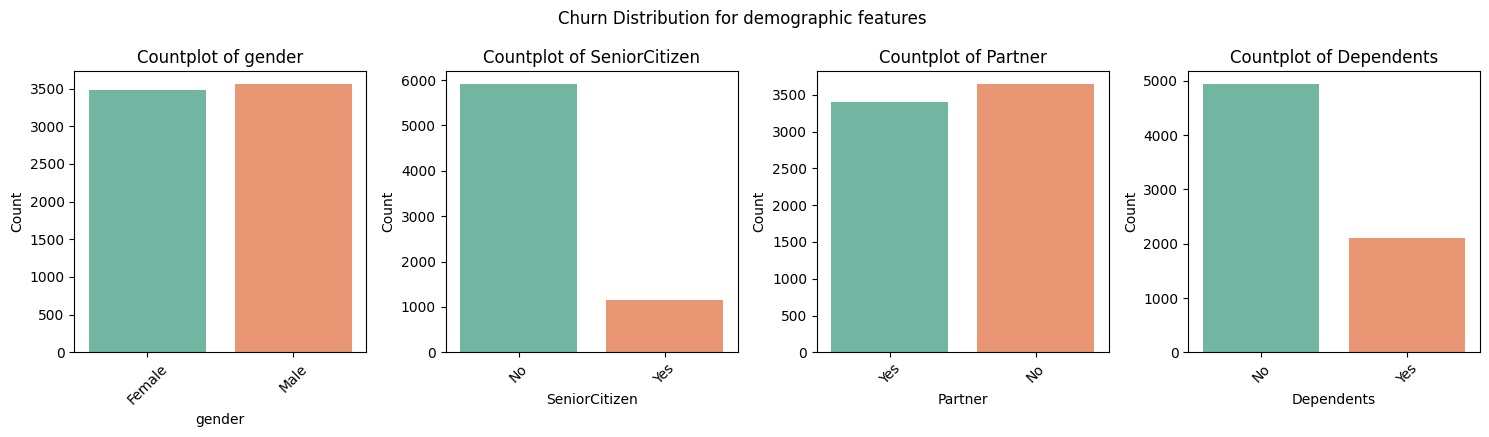

In [15]:

num_rows = 4  # Adjust the number of rows as needed
num_cols = 4  # Adjust the number of columns as needed
total_plots = num_rows * num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axes array
demo = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

df = df1[imp_features]
axes = axes.flatten()

# Iterate over categorical features and create countplots
for i, feature in enumerate(demo):
    if i < total_plots:  # Ensure we don't exceed the number of subplots
        sns.countplot(data=df, x=feature, palette='Set2', ax=axes[i])
        axes[i].set_title(f'Countplot of {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for i in range(len(demo), total_plots):
    fig.delaxes(axes[i])

plt.suptitle(f'Churn Distribution for demographic features \n')

    # Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


gender - the male and female users are about the same amount

Senior Citizen - the number of young users are significantly higher compared to the senior citizens, hence the retention strategies could be leaned towards the senior citizen, to increase their involvement with the product.

Partner - user with and without partner are about the same in number

Dependents - Users without dependents are significantly more in number in comparison to the ones with dependents.



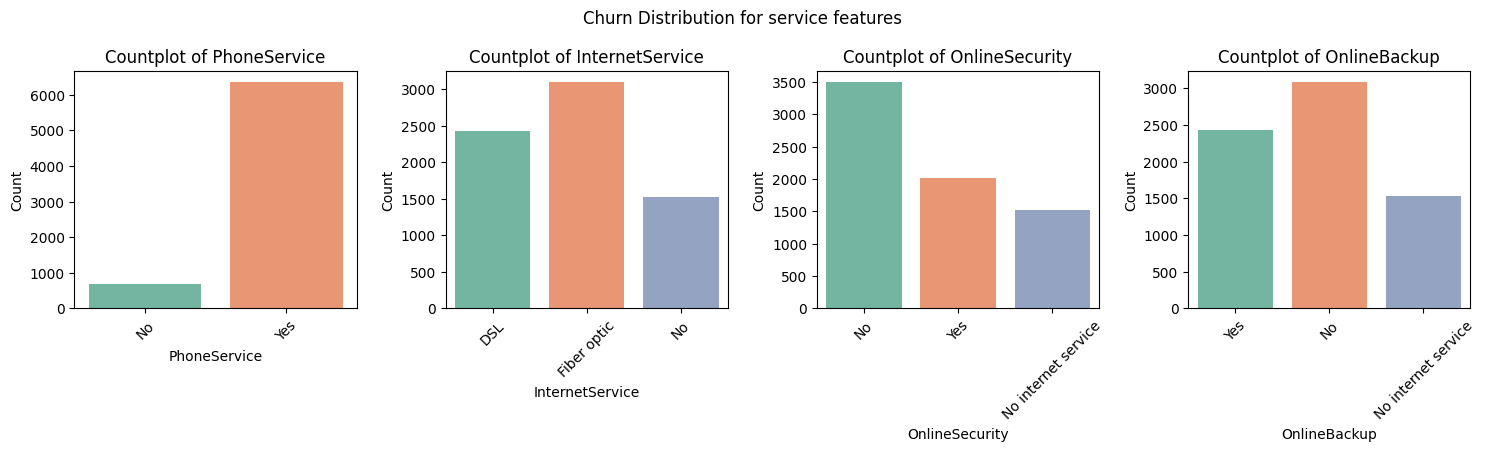

In [16]:

num_rows = 4  # Adjust the number of rows as needed
num_cols = 4  # Adjust the number of columns as needed
total_plots = num_rows * num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axes array
ser = ['PhoneService','InternetService', 'OnlineSecurity', 'OnlineBackup']

df = df1[imp_features]
axes = axes.flatten()

# Iterate over categorical features and create countplots
for i, feature in enumerate(ser):
    if i < total_plots:  # Ensure we don't exceed the number of subplots
        sns.countplot(data=df, x=feature, palette='Set2', ax=axes[i])
        axes[i].set_title(f'Countplot of {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for i in range(len(ser), total_plots):
    fig.delaxes(axes[i])

plt.suptitle(f'Churn Distribution for service features \n')

    # Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


Phone Service - Users with phone service are higher in number

internet Service - Users that prefer Fiber optics are more in number.

Online Security - most of the users who has subscribes for the product does not seem to have online security,which could turn out to be a major reason for churning of the customers in the near future. Hence, one of the retention measures the company take is to provide a more secure online experience for its users.

Online Backup - User who does not subscribe for an online backup are higher in number



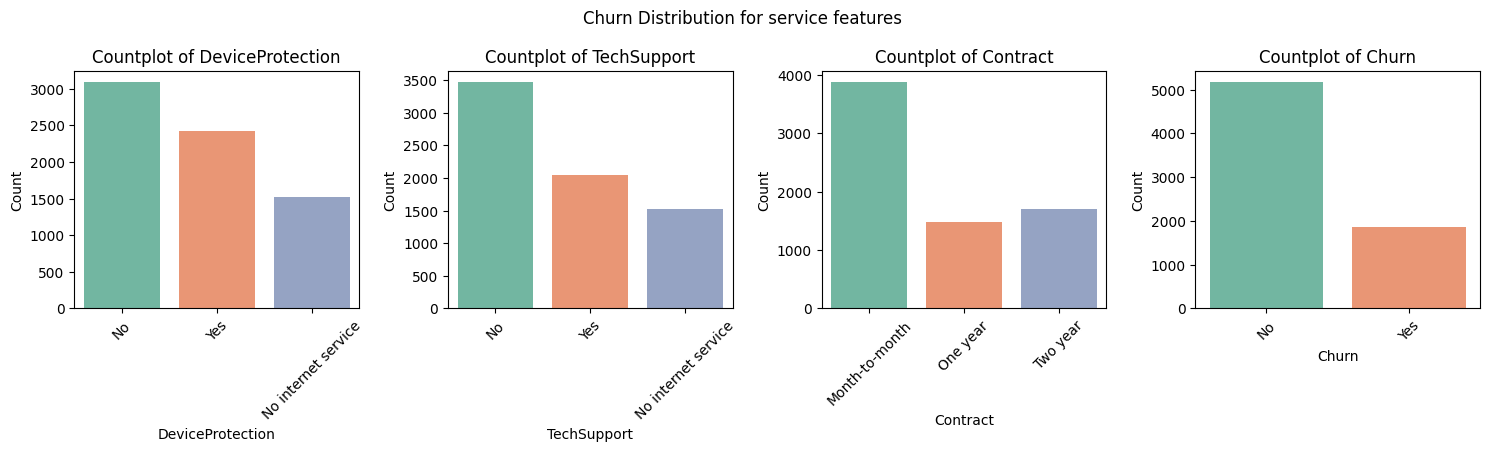

In [17]:

num_rows = 4  # Adjust the number of rows as needed
num_cols = 4  # Adjust the number of columns as needed
total_plots = num_rows * num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axes array
ser1 = ['DeviceProtection', 'TechSupport', 'Contract','Churn']
df = df1[imp_features]
axes = axes.flatten()

# Iterate over categorical features and create countplots
for i, feature in enumerate(ser1):
    if i < total_plots:  # Ensure we don't exceed the number of subplots
        sns.countplot(data=df, x=feature, palette='Set2', ax=axes[i])
        axes[i].set_title(f'Countplot of {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for i in range(len(ser1), total_plots):
    fig.delaxes(axes[i])

plt.suptitle(f'Churn Distribution for service features \n')

    # Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


Device Protection - Users without device protection are more in number, this too could be a reason for customer churn.

TechSupport - as we can observe, many customers did not receive technical support, this too could be a potential reason for customers to churn, as they could not receive proper guidance when in need.


Contract - it can be observed that customers are likely to prefer month-to-month contracts compared to one or two years contracts, it most likely gives them a sense of security, as they can withdraw as soon as possible if the product is not to their liking.

Churn - We have more amount of users who does not churn.

In [18]:
print(df.groupby("Dependents")["Churn"])

In [19]:
churn_counts = df.groupby("Dependents")["Churn"].value_counts()
print(churn_counts)


Dependents  Churn
No          No       3390
            Yes      1543
Yes         No       1784
            Yes       326
Name: count, dtype: int64


In [20]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'Contract', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



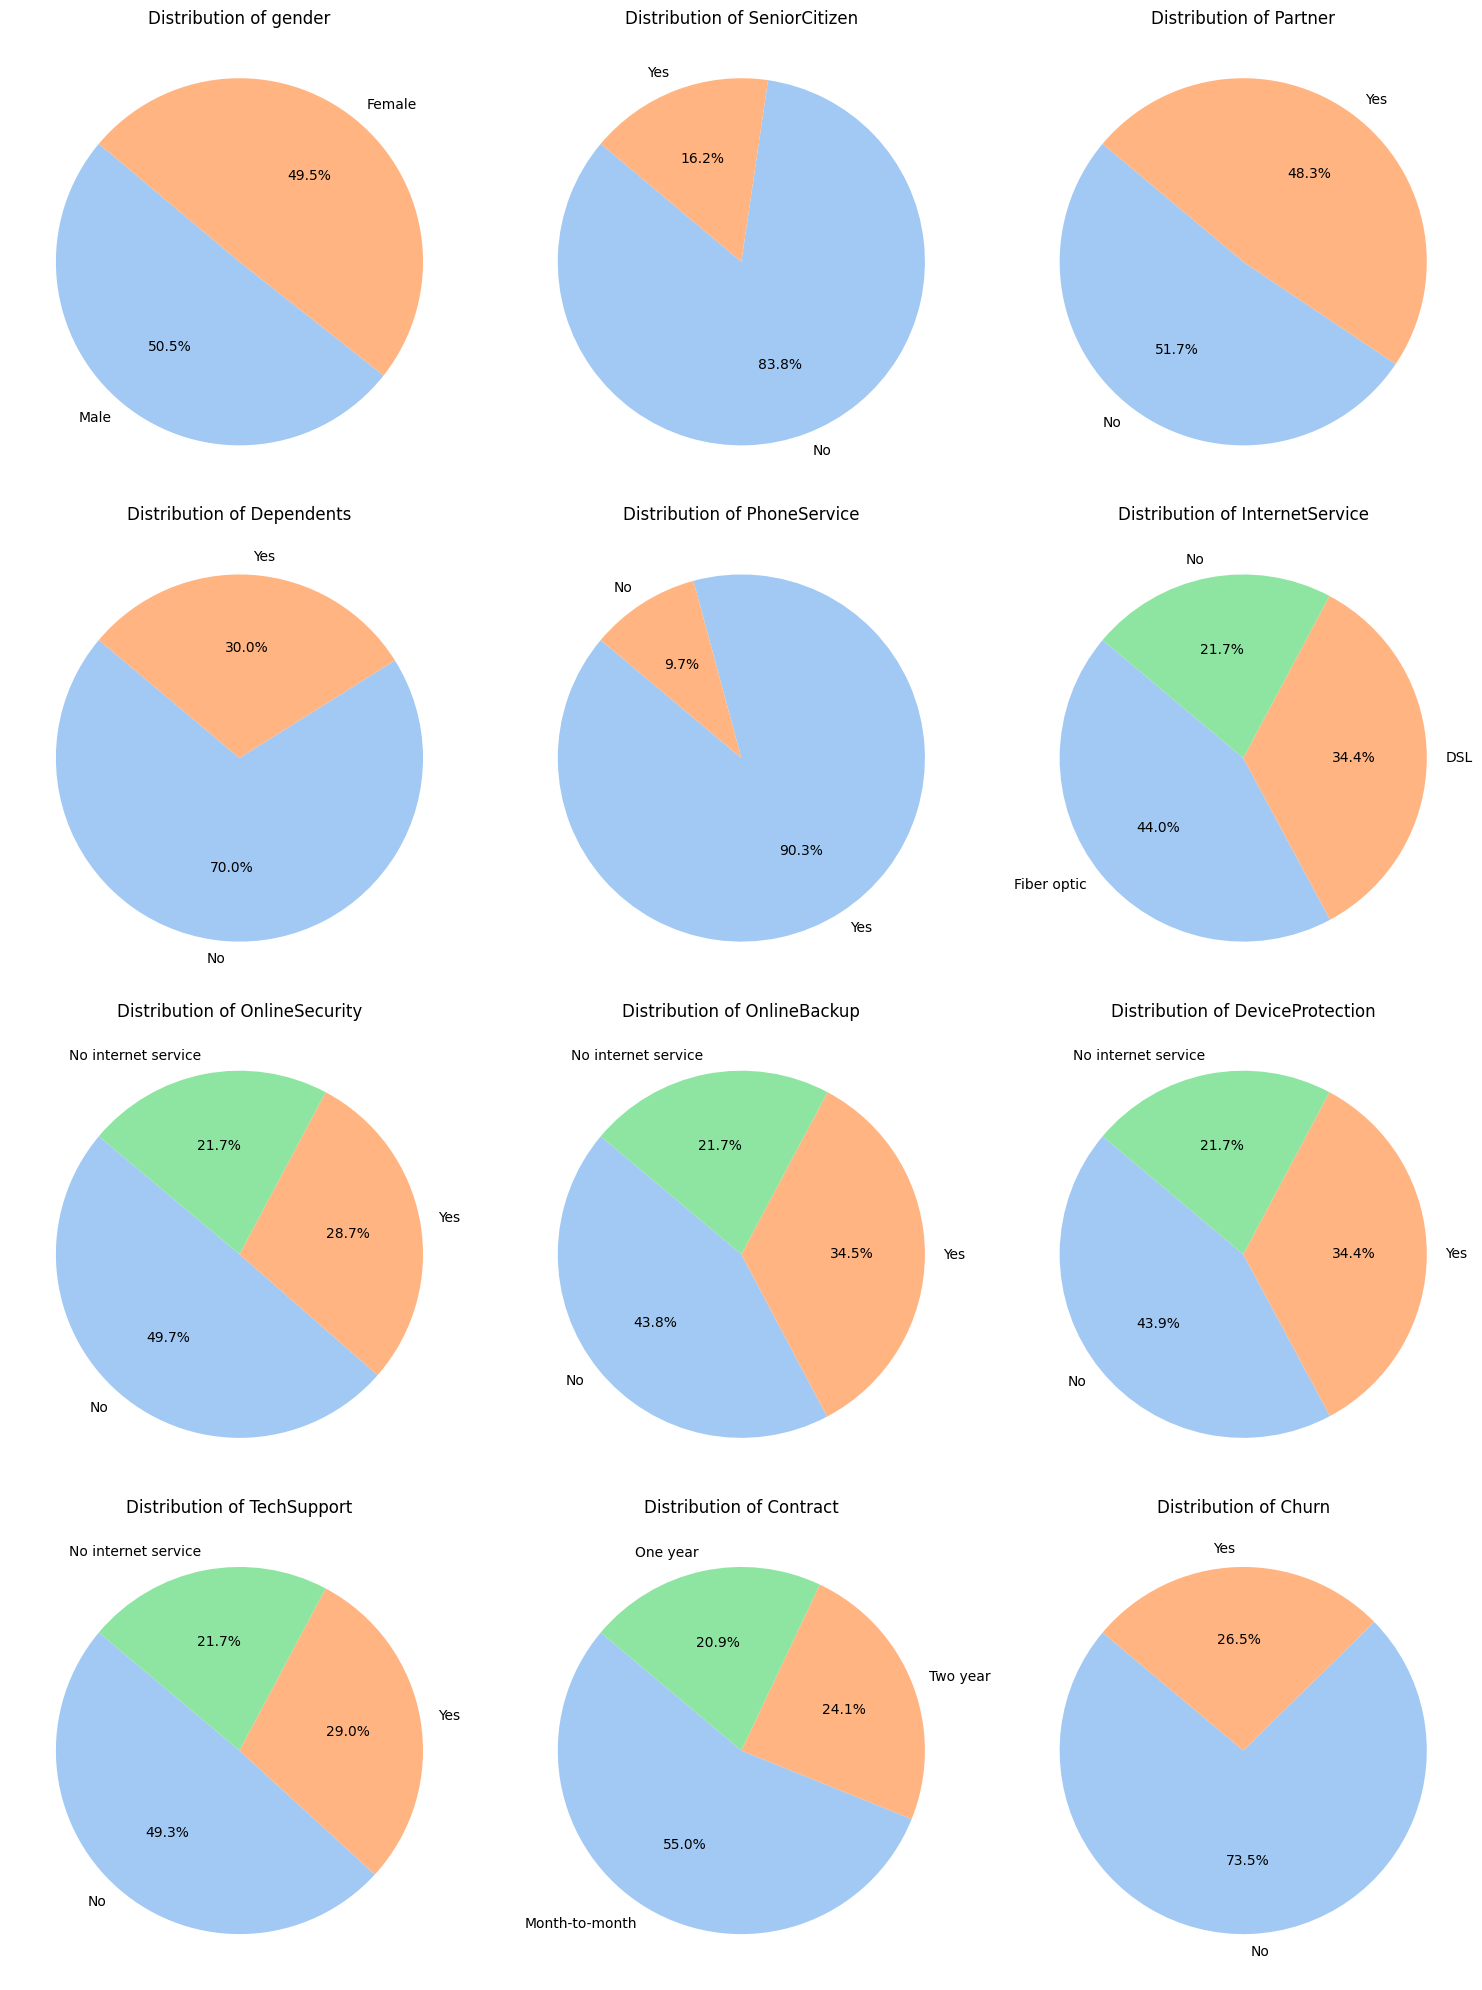

In [22]:


num_cols = 3

num_features = len(categorical_features)
num_rows = (num_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    df[feature].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'), ax=axes[i], startangle=140)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_ylabel('')

for j in range(num_features, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Plotted with the target variable

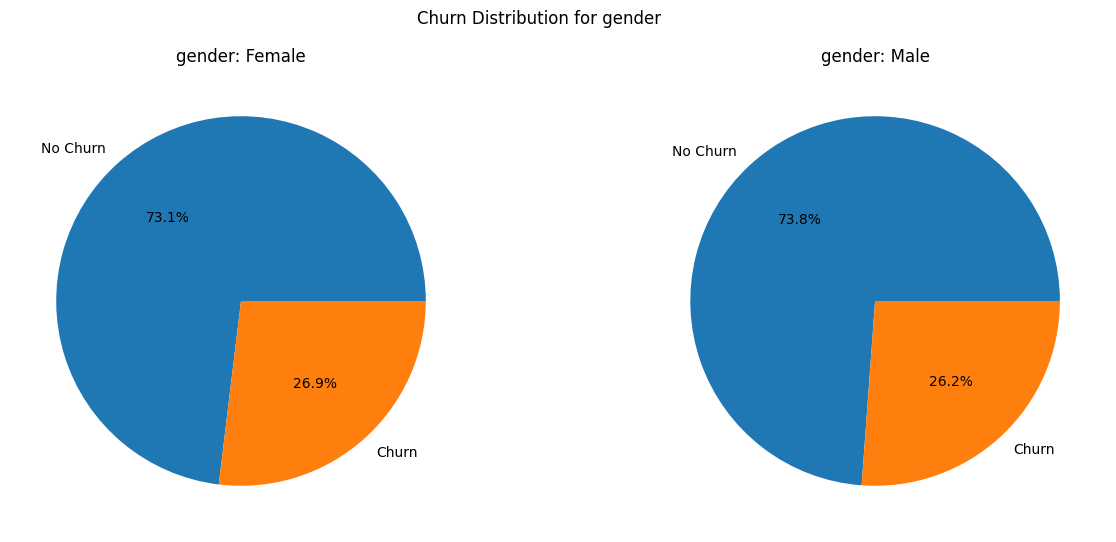

In [23]:

gender = ['gender']
for feature in gender:
    churn_counts = df.groupby(feature)["Churn"].value_counts().unstack()
    churn_counts.columns = ['No Churn', 'Churn']

    churn_counts_reset = churn_counts.reset_index().melt(id_vars=feature, var_name="Churn_Status", value_name="Count")

    churn_counts_reset['Percentage'] = churn_counts_reset.groupby(feature)['Count'].transform(lambda x: (x / x.sum()) * 100)

    unique_values = churn_counts.index
    fig, axes = plt.subplots(1, len(unique_values), figsize=(15, 6))

    for i, value in enumerate(unique_values):
        subset = churn_counts_reset[churn_counts_reset[feature] == value]
        axes[i].pie(subset['Percentage'], labels=subset['Churn_Status'], autopct='%1.1f%%')
        axes[i].set_title(f'{feature}: {value}')
    
    plt.suptitle(f'Churn Distribution for {feature}')
    plt.show()

gender - churning in male and female uswrs are about the same.



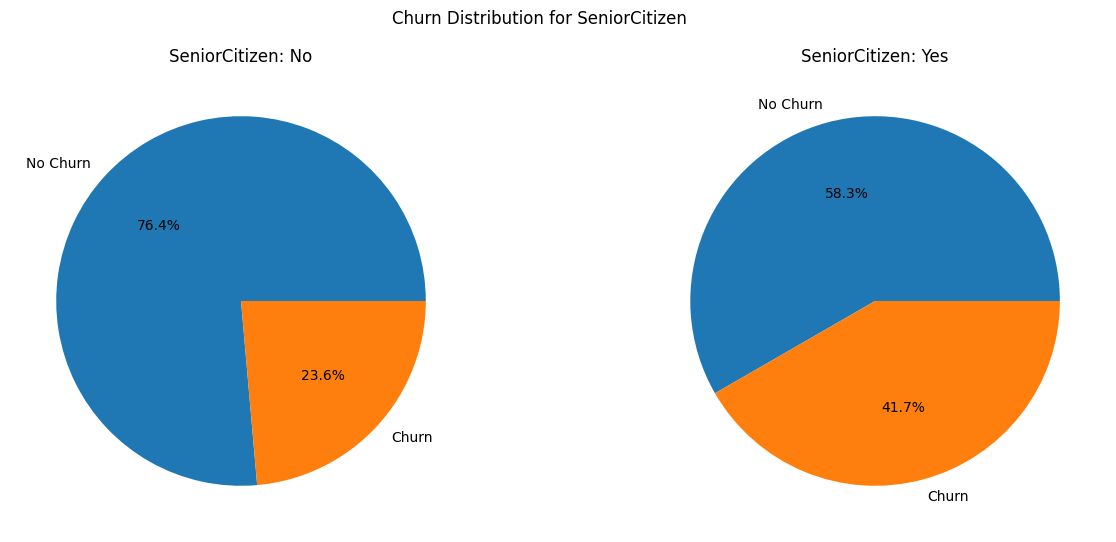

In [24]:

SeniorCitizen = ['SeniorCitizen']
for feature in SeniorCitizen:
    churn_counts = df.groupby(feature)["Churn"].value_counts().unstack()
    churn_counts.columns = ['No Churn', 'Churn']

    churn_counts_reset = churn_counts.reset_index().melt(id_vars=feature, var_name="Churn_Status", value_name="Count")

    churn_counts_reset['Percentage'] = churn_counts_reset.groupby(feature)['Count'].transform(lambda x: (x / x.sum()) * 100)

    unique_values = churn_counts.index
    fig, axes = plt.subplots(1, len(unique_values), figsize=(15, 6))

    for i, value in enumerate(unique_values):
        subset = churn_counts_reset[churn_counts_reset[feature] == value]
        axes[i].pie(subset['Percentage'], labels=subset['Churn_Status'], autopct='%1.1f%%')
        axes[i].set_title(f'{feature}: {value}')
    
    plt.suptitle(f'Churn Distribution for {feature}')
    plt.show()

Senior Citizen - even though the number of young users are significantly higher compared to the senior citizens, churning rate in senior citizens are significantly higher. nearly 42 percent of senior citizens tend to churn whereas, onlyu 23 percentage of younger generation have churned.


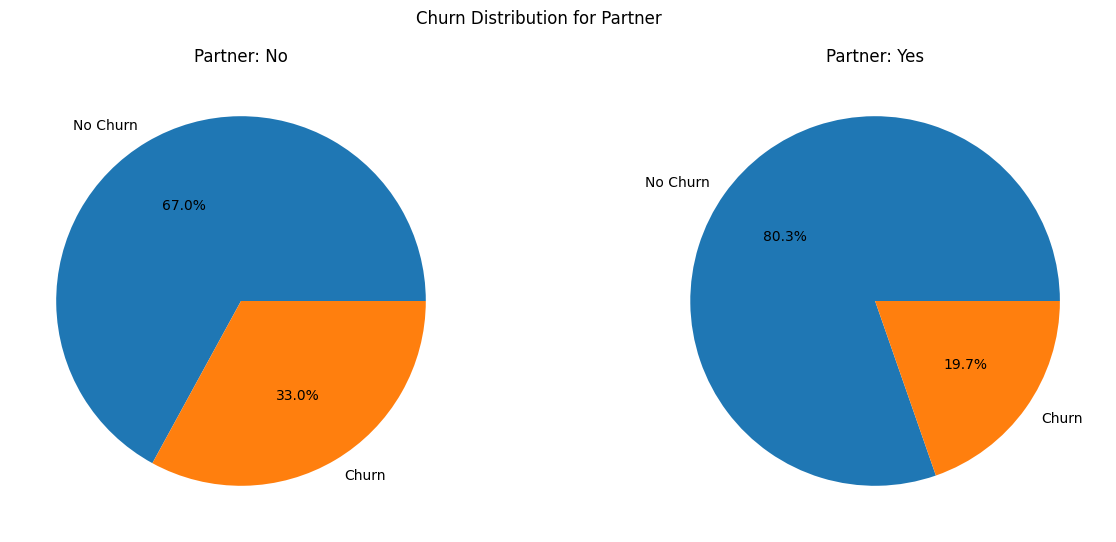

In [25]:

Partner = ['Partner']
for feature in Partner:
    churn_counts = df.groupby(feature)["Churn"].value_counts().unstack()
    churn_counts.columns = ['No Churn', 'Churn']

    churn_counts_reset = churn_counts.reset_index().melt(id_vars=feature, var_name="Churn_Status", value_name="Count")

    churn_counts_reset['Percentage'] = churn_counts_reset.groupby(feature)['Count'].transform(lambda x: (x / x.sum()) * 100)

    unique_values = churn_counts.index
    fig, axes = plt.subplots(1, len(unique_values), figsize=(15, 6))

    for i, value in enumerate(unique_values):
        subset = churn_counts_reset[churn_counts_reset[feature] == value]
        axes[i].pie(subset['Percentage'], labels=subset['Churn_Status'], autopct='%1.1f%%')
        axes[i].set_title(f'{feature}: {value}')
    
    plt.suptitle(f'Churn Distribution for {feature}')
    plt.show()

Partner - user with and without partner are about the same in number, but users without partner tend to churn higher than the once with a partner (by about 10%).


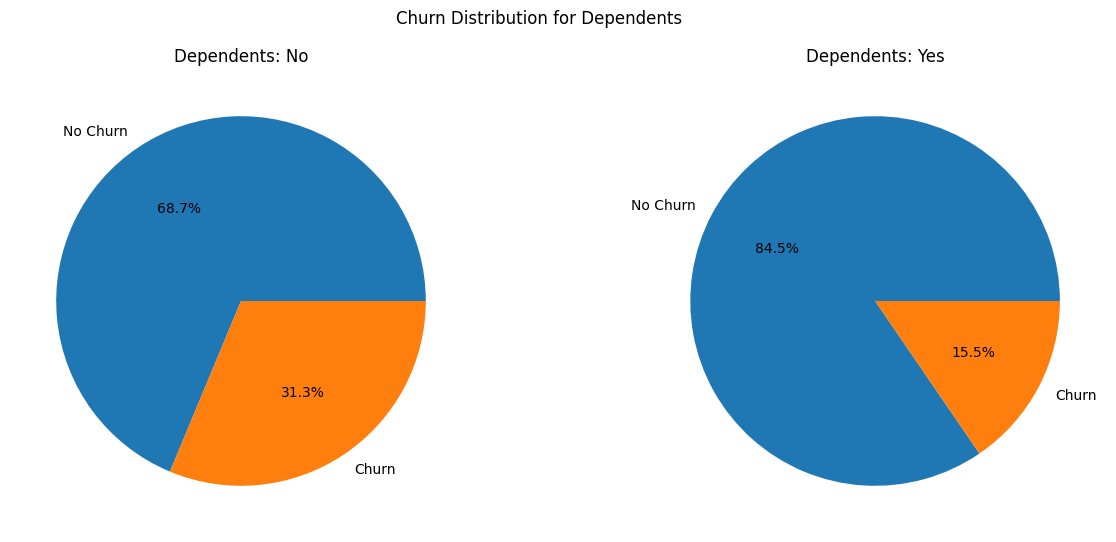

In [26]:

Dependents = ['Dependents']
for feature in Dependents:
    churn_counts = df.groupby(feature)["Churn"].value_counts().unstack()
    churn_counts.columns = ['No Churn', 'Churn']

    churn_counts_reset = churn_counts.reset_index().melt(id_vars=feature, var_name="Churn_Status", value_name="Count")

    churn_counts_reset['Percentage'] = churn_counts_reset.groupby(feature)['Count'].transform(lambda x: (x / x.sum()) * 100)

    unique_values = churn_counts.index
    fig, axes = plt.subplots(1, len(unique_values), figsize=(15, 6))

    for i, value in enumerate(unique_values):
        subset = churn_counts_reset[churn_counts_reset[feature] == value]
        axes[i].pie(subset['Percentage'], labels=subset['Churn_Status'], autopct='%1.1f%%')
        axes[i].set_title(f'{feature}: {value}')
    
    plt.suptitle(f'Churn Distribution for {feature}')
    plt.show()

Dependents - Users without dependents are significantly more in number in comparison to the ones with dependents. And people who does not have dependents tend to churn more. My guess would be that, people with dependents (family) tend to get family subscriptions which mostly tend to have a discount, which the users without dependents can not user this feature. So, having retention strategies that focuses on users without dependents might help in decreasing the churn.


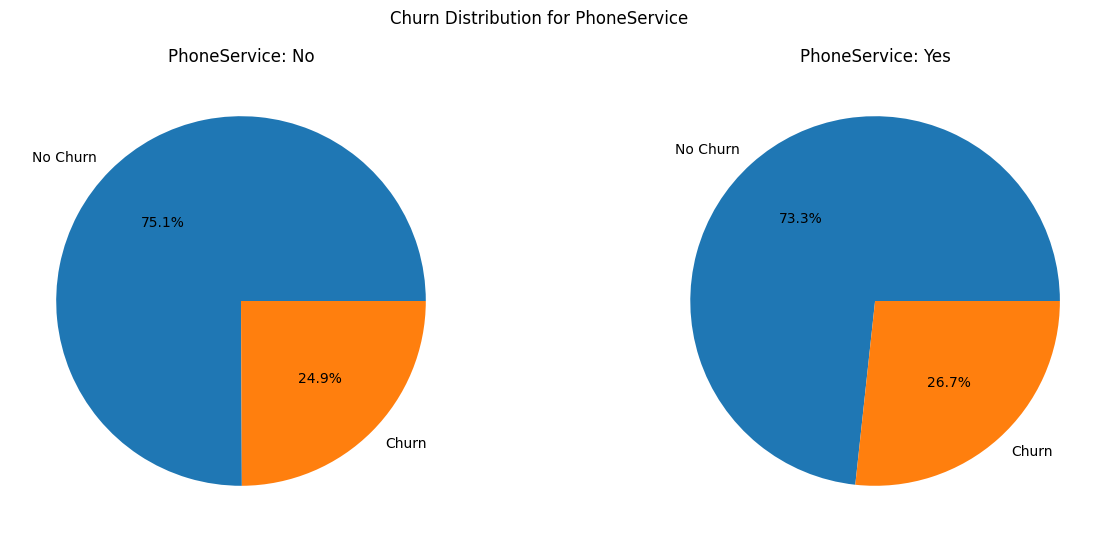

In [27]:

PhoneService = ['PhoneService']
for feature in PhoneService:
    churn_counts = df.groupby(feature)["Churn"].value_counts().unstack()
    churn_counts.columns = ['No Churn', 'Churn']

    churn_counts_reset = churn_counts.reset_index().melt(id_vars=feature, var_name="Churn_Status", value_name="Count")

    churn_counts_reset['Percentage'] = churn_counts_reset.groupby(feature)['Count'].transform(lambda x: (x / x.sum()) * 100)

    unique_values = churn_counts.index
    fig, axes = plt.subplots(1, len(unique_values), figsize=(15, 6))

    for i, value in enumerate(unique_values):
        subset = churn_counts_reset[churn_counts_reset[feature] == value]
        axes[i].pie(subset['Percentage'], labels=subset['Churn_Status'], autopct='%1.1f%%')
        axes[i].set_title(f'{feature}: {value}')
    
    plt.suptitle(f'Churn Distribution for {feature}')
    plt.show()

Phone Service - Users with phone service are higher in number, and the churn percentage is about the same for both.


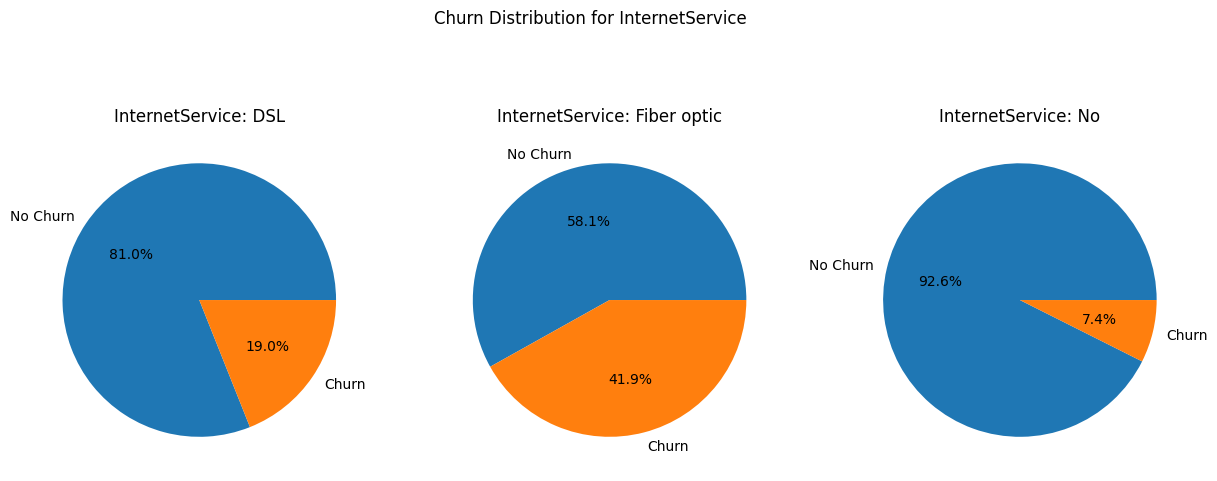

In [28]:

InternetService = ['InternetService']
for feature in InternetService:
    churn_counts = df.groupby(feature)["Churn"].value_counts().unstack()
    churn_counts.columns = ['No Churn', 'Churn']

    churn_counts_reset = churn_counts.reset_index().melt(id_vars=feature, var_name="Churn_Status", value_name="Count")

    churn_counts_reset['Percentage'] = churn_counts_reset.groupby(feature)['Count'].transform(lambda x: (x / x.sum()) * 100)

    unique_values = churn_counts.index
    fig, axes = plt.subplots(1, len(unique_values), figsize=(15, 6))

    for i, value in enumerate(unique_values):
        subset = churn_counts_reset[churn_counts_reset[feature] == value]
        axes[i].pie(subset['Percentage'], labels=subset['Churn_Status'], autopct='%1.1f%%')
        axes[i].set_title(f'{feature}: {value}')
    
    plt.suptitle(f'Churn Distribution for {feature}')
    plt.show()

internet Service - Users that prefer Fiber optics are more in number. And the users who have churned are also more in number. nearly 42% have churned. The cost could be a factor, as fibre optic costs higher than dsl.


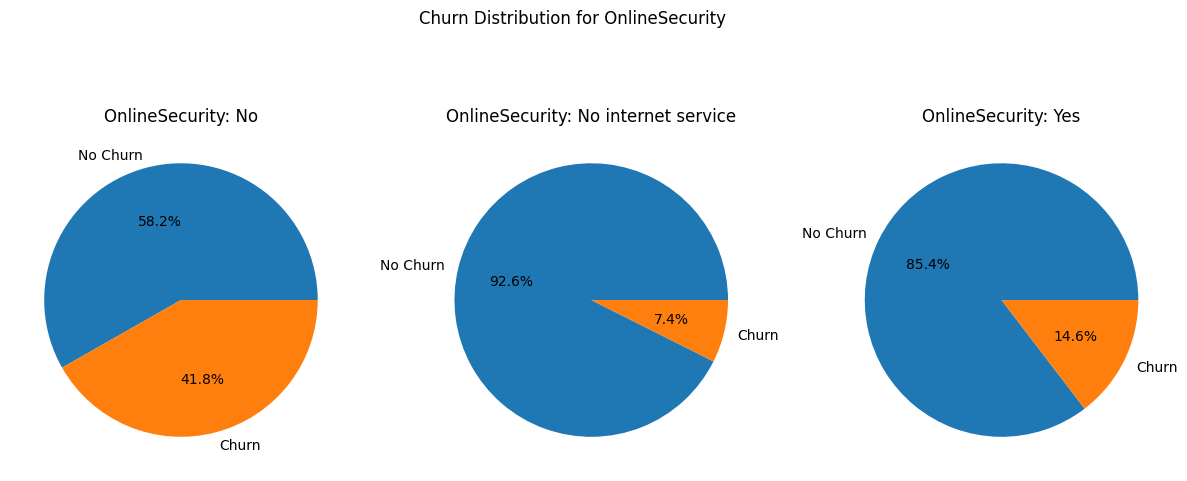

In [29]:

OnlineSecurity = ['OnlineSecurity']
for feature in OnlineSecurity:
    churn_counts = df.groupby(feature)["Churn"].value_counts().unstack()
    churn_counts.columns = ['No Churn', 'Churn']

    churn_counts_reset = churn_counts.reset_index().melt(id_vars=feature, var_name="Churn_Status", value_name="Count")

    churn_counts_reset['Percentage'] = churn_counts_reset.groupby(feature)['Count'].transform(lambda x: (x / x.sum()) * 100)

    unique_values = churn_counts.index
    fig, axes = plt.subplots(1, len(unique_values), figsize=(15, 6))

    for i, value in enumerate(unique_values):
        subset = churn_counts_reset[churn_counts_reset[feature] == value]
        axes[i].pie(subset['Percentage'], labels=subset['Churn_Status'], autopct='%1.1f%%')
        axes[i].set_title(f'{feature}: {value}')
    
    plt.suptitle(f'Churn Distribution for {feature}')
    plt.show()

Online Security - we have observed that most of the users who has subscribes for the product does not seem to have online security,and predicted that it could turn out to be a major reason for churning of the customers in the near future. True to our prediction, 42% of the customers who did not receive online security have churned.


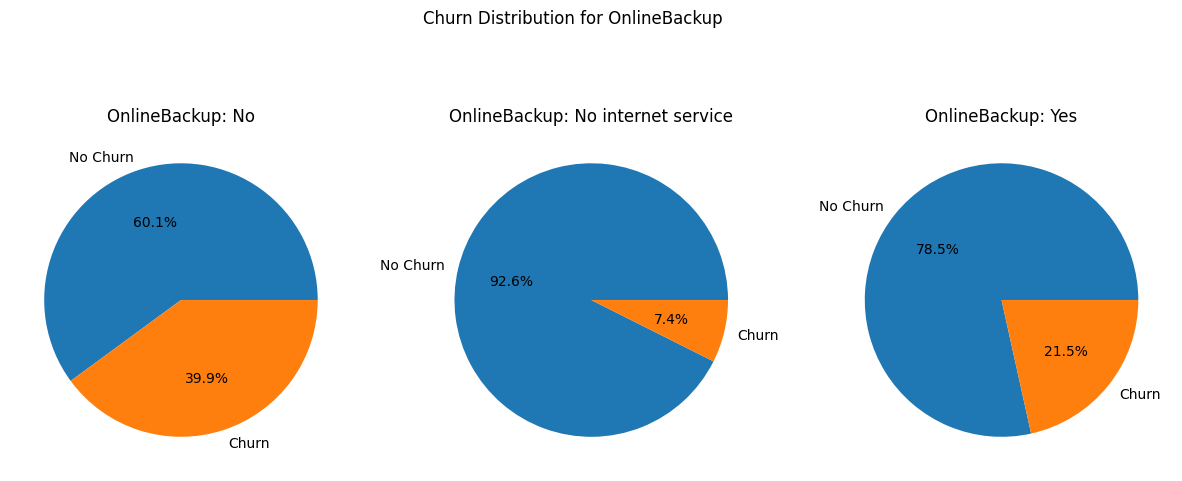

In [30]:

OnlineBackup = ['OnlineBackup']
for feature in OnlineBackup:
    churn_counts = df.groupby(feature)["Churn"].value_counts().unstack()
    churn_counts.columns = ['No Churn', 'Churn']

    churn_counts_reset = churn_counts.reset_index().melt(id_vars=feature, var_name="Churn_Status", value_name="Count")

    churn_counts_reset['Percentage'] = churn_counts_reset.groupby(feature)['Count'].transform(lambda x: (x / x.sum()) * 100)

    unique_values = churn_counts.index
    fig, axes = plt.subplots(1, len(unique_values), figsize=(15, 6))

    for i, value in enumerate(unique_values):
        subset = churn_counts_reset[churn_counts_reset[feature] == value]
        axes[i].pie(subset['Percentage'], labels=subset['Churn_Status'], autopct='%1.1f%%')
        axes[i].set_title(f'{feature}: {value}')
    
    plt.suptitle(f'Churn Distribution for {feature}')
    plt.show()

Online Backup - User who does not subscribe for an online backup are higher in number


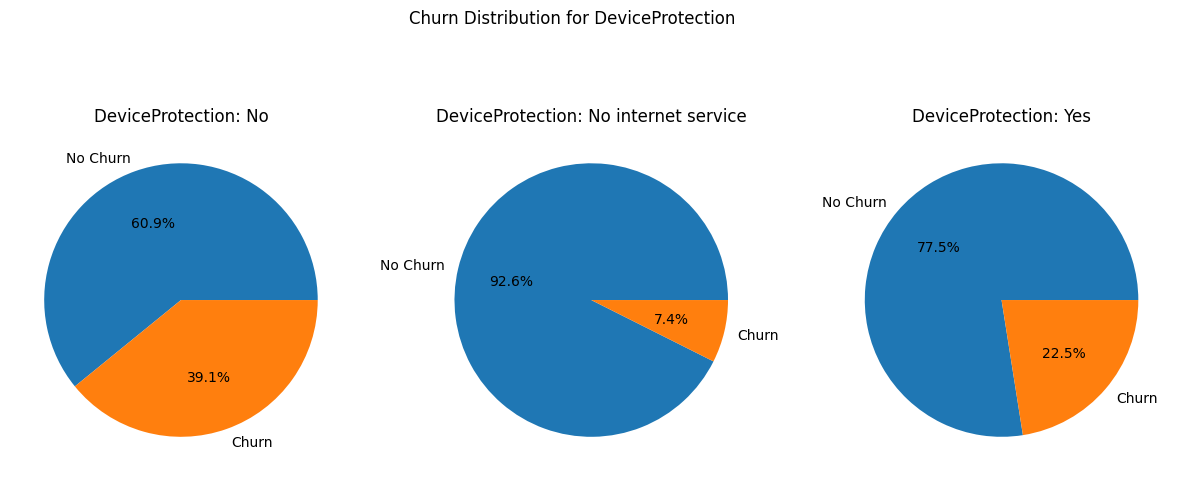

In [31]:

DeviceProtection  = ['DeviceProtection']
for feature in DeviceProtection:
    churn_counts = df.groupby(feature)["Churn"].value_counts().unstack()
    churn_counts.columns = ['No Churn', 'Churn']

    churn_counts_reset = churn_counts.reset_index().melt(id_vars=feature, var_name="Churn_Status", value_name="Count")

    churn_counts_reset['Percentage'] = churn_counts_reset.groupby(feature)['Count'].transform(lambda x: (x / x.sum()) * 100)

    unique_values = churn_counts.index
    fig, axes = plt.subplots(1, len(unique_values), figsize=(15, 6))

    for i, value in enumerate(unique_values):
        subset = churn_counts_reset[churn_counts_reset[feature] == value]
        axes[i].pie(subset['Percentage'], labels=subset['Churn_Status'], autopct='%1.1f%%')
        axes[i].set_title(f'{feature}: {value}')
    
    plt.suptitle(f'Churn Distribution for {feature}')
    plt.show()

Device Protection - we observed that Users without device protection are more in number, and that it could be a reason for customer churn. True to our prediction nearly 39% of users who does not have device protection has left the product. But contradictorily, 22% of users who has device protection have also left the product.


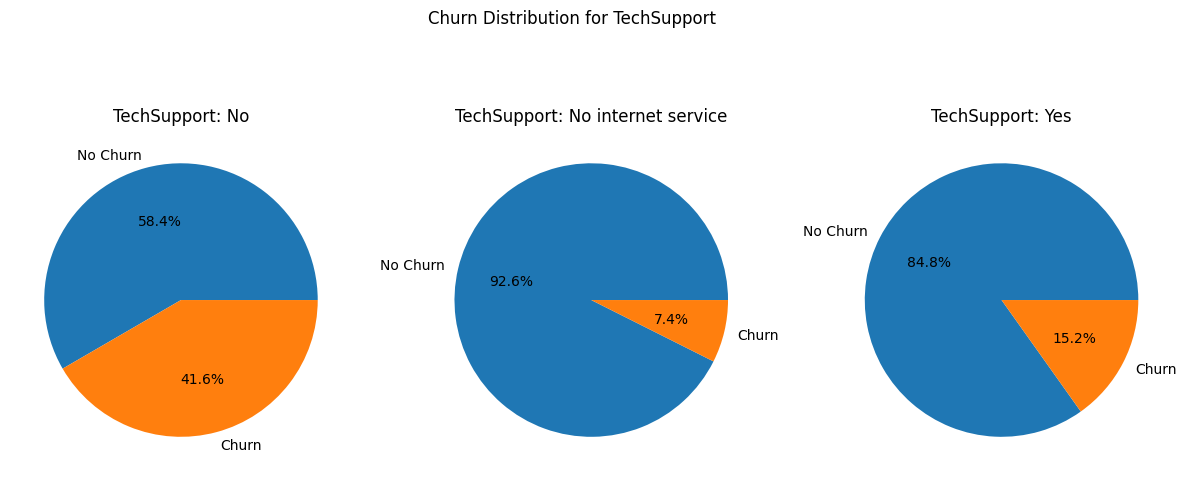

In [32]:

TechSupport  = ['TechSupport']
for feature in TechSupport:
    churn_counts = df.groupby(feature)["Churn"].value_counts().unstack()
    churn_counts.columns = ['No Churn', 'Churn']

    churn_counts_reset = churn_counts.reset_index().melt(id_vars=feature, var_name="Churn_Status", value_name="Count")

    churn_counts_reset['Percentage'] = churn_counts_reset.groupby(feature)['Count'].transform(lambda x: (x / x.sum()) * 100)

    unique_values = churn_counts.index
    fig, axes = plt.subplots(1, len(unique_values), figsize=(15, 6))

    for i, value in enumerate(unique_values):
        subset = churn_counts_reset[churn_counts_reset[feature] == value]
        axes[i].pie(subset['Percentage'], labels=subset['Churn_Status'], autopct='%1.1f%%')
        axes[i].set_title(f'{feature}: {value}')
    
    plt.suptitle(f'Churn Distribution for {feature}')
    plt.show()

TechSupport -  we initially observed that, many customers did not receive technical support, and predicted that it could be a potential reason for customers to churn, as they could not receive proper guidance when in need. True to our prediction, nearly 42% of users who did not receive any tech support has discontinued the product.


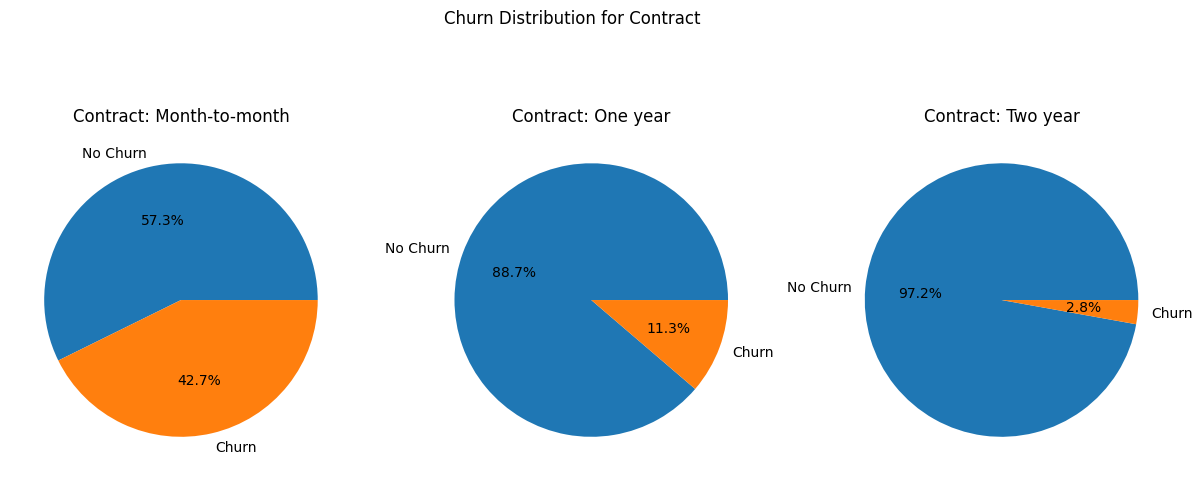

In [33]:

Contract  = ['Contract']
for feature in Contract:
    churn_counts = df.groupby(feature)["Churn"].value_counts().unstack()
    churn_counts.columns = ['No Churn', 'Churn']

    churn_counts_reset = churn_counts.reset_index().melt(id_vars=feature, var_name="Churn_Status", value_name="Count")

    churn_counts_reset['Percentage'] = churn_counts_reset.groupby(feature)['Count'].transform(lambda x: (x / x.sum()) * 100)

    unique_values = churn_counts.index
    fig, axes = plt.subplots(1, len(unique_values), figsize=(15, 6))

    for i, value in enumerate(unique_values):
        subset = churn_counts_reset[churn_counts_reset[feature] == value]
        axes[i].pie(subset['Percentage'], labels=subset['Churn_Status'], autopct='%1.1f%%')
        axes[i].set_title(f'{feature}: {value}')
    
    plt.suptitle(f'Churn Distribution for {feature}')
    plt.show()

Contract - we observed that customers are likely to prefer month-to-month contracts compared to one or two years contracts which could be to test out the product and see if its to their liking. Predictably, month-to-month subscription has been faced with 43% of churn compared to its counterparts (1 year and 2 years) which are 11% and 3% respectively.


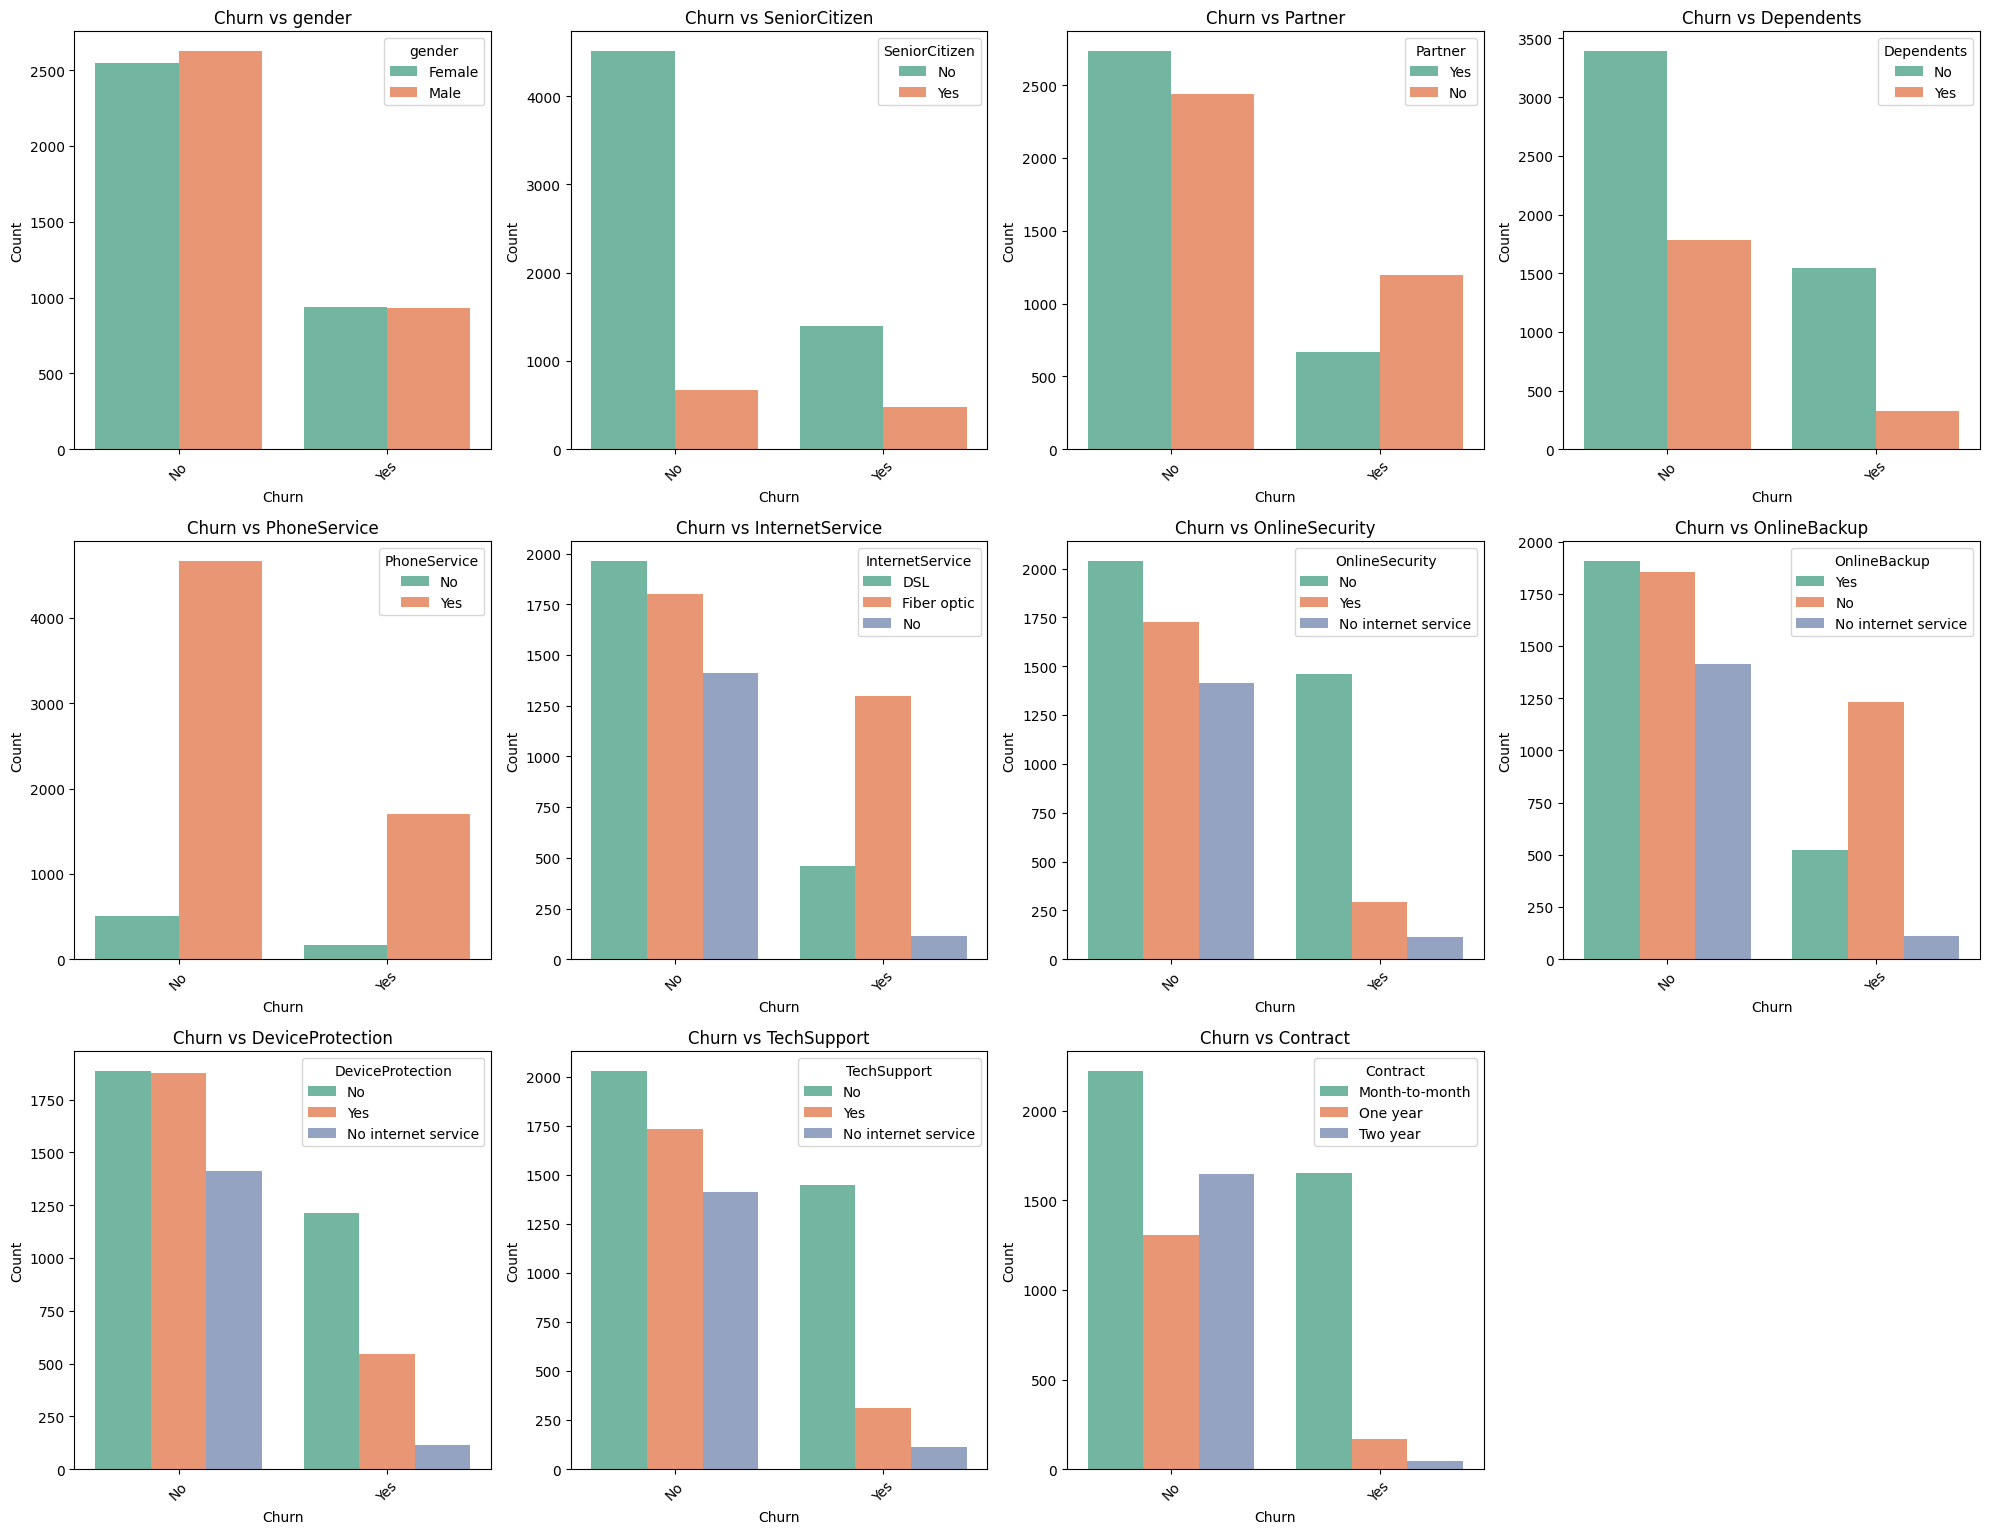

In [34]:
num_rows = 4  
num_cols = 4  
total_plots = num_rows * num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))


axes = axes.flatten()

for i, feature in enumerate(cat_features):
    if i < total_plots:  
        sns.countplot(data=df, x='Churn', hue=feature, palette='Set2', ax=axes[i])
        axes[i].set_title(f'Churn vs {feature}')
        axes[i].set_xlabel('Churn')
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].legend(title=feature, loc='upper right')

for i in range(len(cat_features), total_plots):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


the younger population is higher in terms of usage of the product. So, it can be inferred 
that the maximum of the population tend to not churn.
people with proper phoneservice do not tend to churn.
more people who use fibre optics seem to churn, this could also be due to higher usage of fibre optics among the customers or it could be because of poor service.

Many people who has churn did not seem to receive tech support - so, it could be due to poor customer service and assistance that they decided to discontinue the product

many customers who has churned discontinued due to the lack of online security

many customer who has churned seem to be in a month- to- month contract, hence it is a possibility that they could have discontinued after the contract gets over.

In [35]:
for feature in cat_features:
    crosstab = pd.crosstab(df[feature], df['Churn'], normalize='index')
    print(f'\n {feature} and Churn:\n')
    print(crosstab)


 gender and Churn:

Churn         No       Yes
gender                    
Female  0.730791  0.269209
Male    0.738397  0.261603

 SeniorCitizen and Churn:

Churn                No       Yes
SeniorCitizen                    
No             0.763938  0.236062
Yes            0.583187  0.416813

 Partner and Churn:

Churn          No       Yes
Partner                    
No       0.670420  0.329580
Yes      0.803351  0.196649

 Dependents and Churn:

Churn             No       Yes
Dependents                    
No          0.687209  0.312791
Yes         0.845498  0.154502

 PhoneService and Churn:

Churn               No       Yes
PhoneService                    
No            0.750733  0.249267
Yes           0.732904  0.267096

 InternetService and Churn:

Churn                  No       Yes
InternetService                    
DSL              0.810409  0.189591
Fiber optic      0.581072  0.418928
No               0.925950  0.074050

 OnlineSecurity and Churn:

Churn                     

### 2. For Numerical Features 

C:\Users\Srinidhi\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


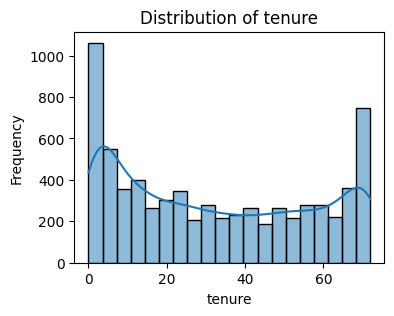

C:\Users\Srinidhi\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


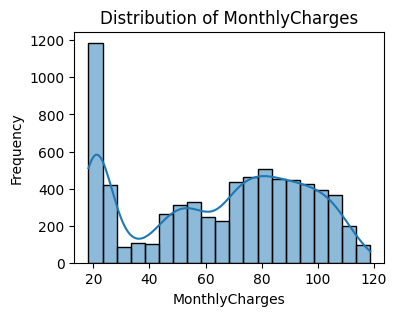

C:\Users\Srinidhi\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


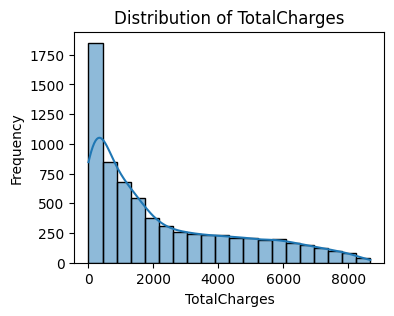

In [36]:

# Distribution of numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
for feature in numerical_features:
    plt.figure(figsize=(4, 3))
    sns.histplot(df[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()
# frequency - no of datapoints falling in each bin of the histogram

most people tend to use products with less monthly charges/ total charges compared to the higher ones

tenure - most people seem to use products for a lesser tenure (could be a trial). - mildly right skewed

Monthly Charges - it is observed that most users prefer lower monthly charges for their subscription.- mildly right skewed

TotalCharges - total charges is related to tenure, so if people prefer less tenure, then they automatically get a lesser total charge. - right skewed

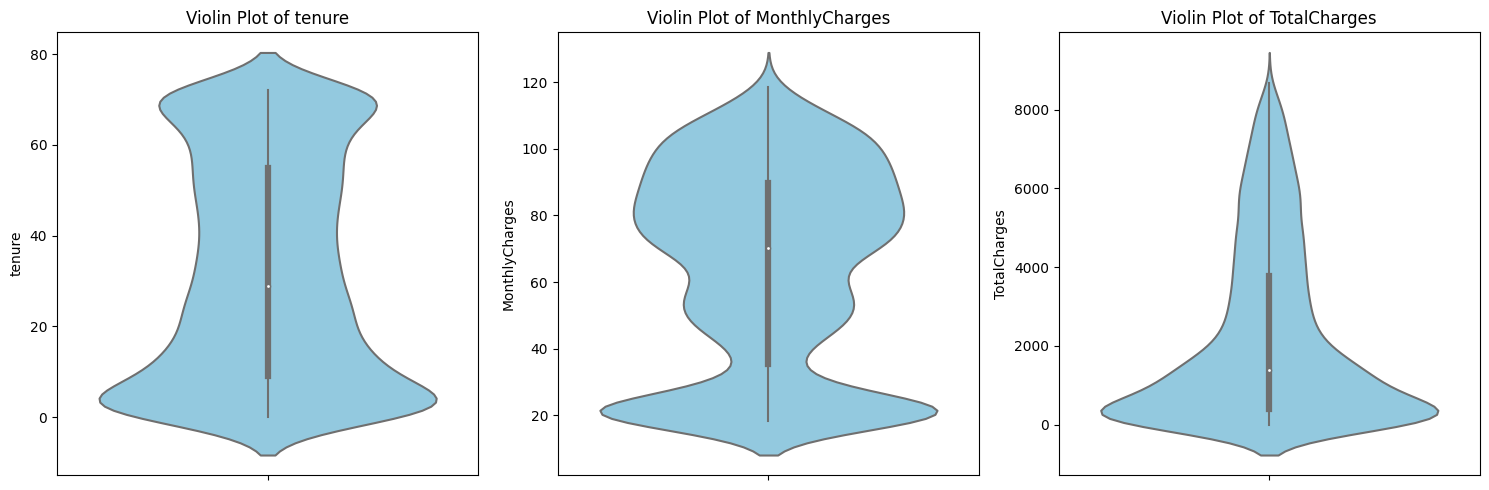

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_features), figsize=(15, 5))
for i, col in enumerate(numerical_features):
    sns.violinplot(y=col, data=df, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Violin Plot of {col}')
plt.tight_layout()
plt.show()

### Plotted with the target variable

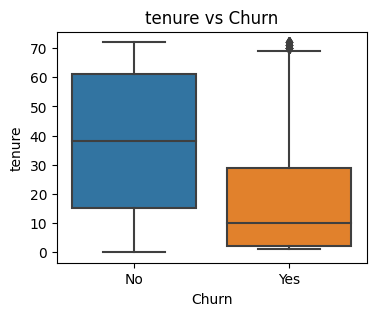

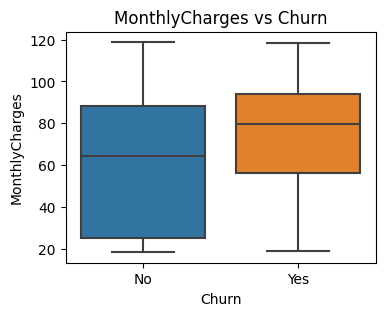

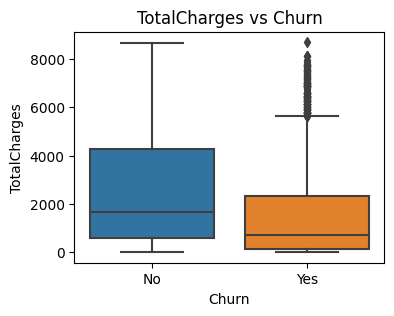

In [38]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

#bivariate analysis
for feature in numerical_features:
    plt.figure(figsize=(4, 3))
    sns.boxplot(data=df, x='Churn', y=feature)
    plt.title(f'{feature} vs Churn')
    plt.xlabel('Churn')
    plt.ylabel(feature)
    plt.show()

when monthly subscription is high, customers tend to churn.

customers tend to churn when tenure is less. mostly likely they decided they dont like it after a short trial period, or left the service due to disatisfaction.

the high churn at lesser total charge can directy be connected to the less tenure, if a customer is staying for a short while their total charge would also be less

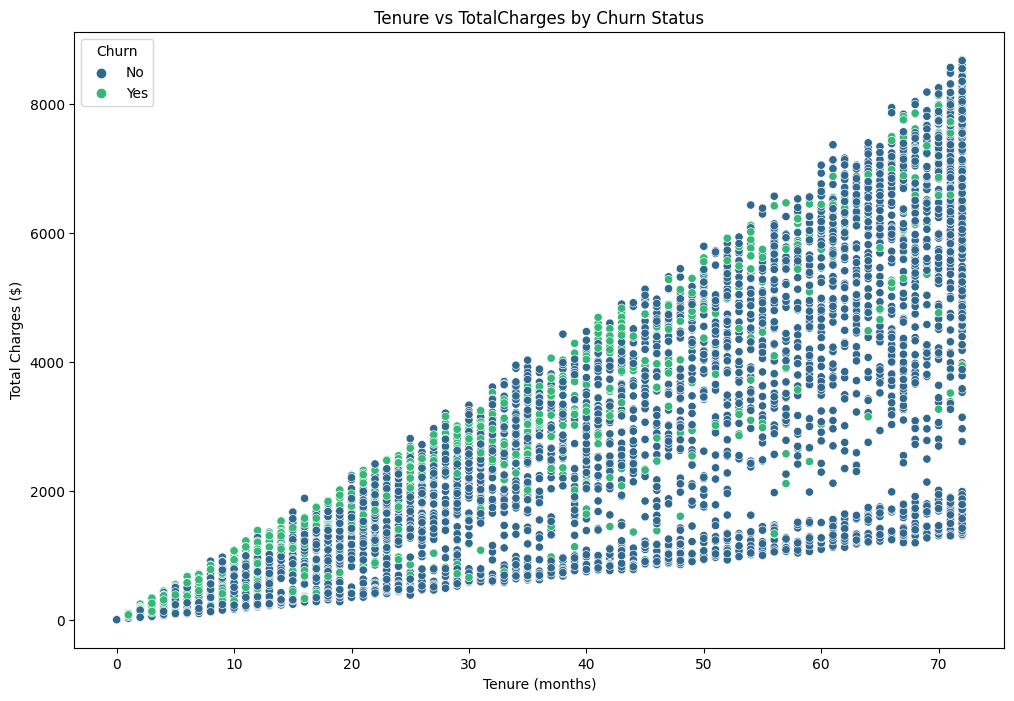

In [39]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='tenure', y='TotalCharges', hue='Churn', palette='viridis')

# Add titles and labels
plt.title('Tenure vs TotalCharges by Churn Status')
plt.xlabel('Tenure (months)')
plt.ylabel('Total Charges ($)')

# Show the plot
plt.show()

We can see that the green dots(churn) is denser at initial stages, where total charge and tenure are less, and gets subsequently lesser as the tenure period increases

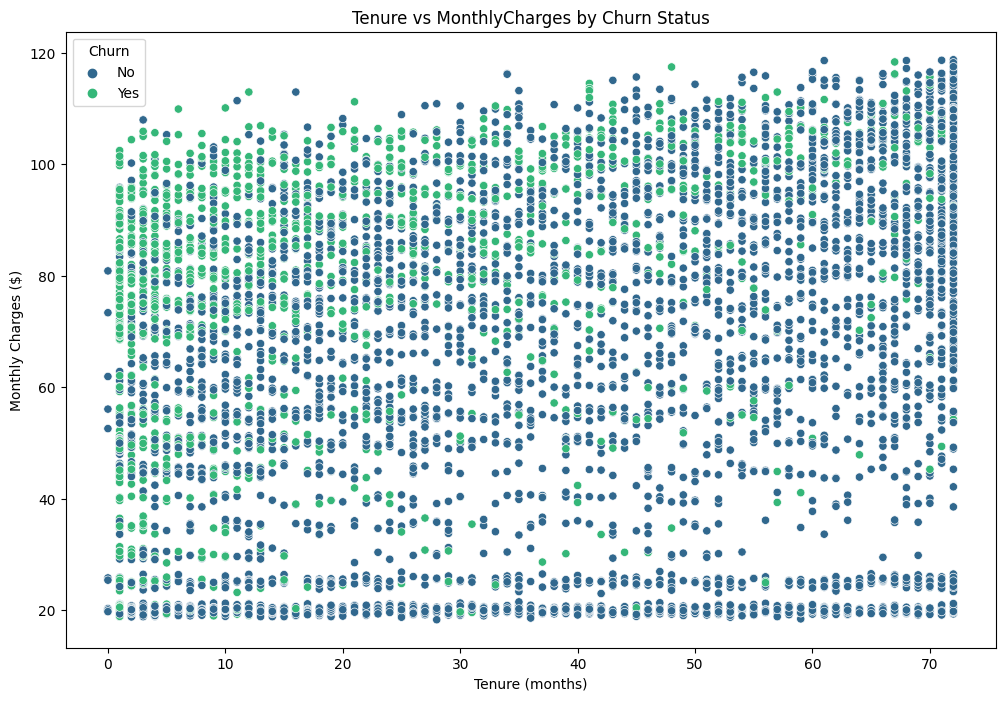

In [40]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn', palette='viridis')

# Add titles and labels
plt.title('Tenure vs MonthlyCharges by Churn Status')
plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges ($)')

# Show the plot
plt.show()

we can observe that if monthly charges are high people tend to leave earlier (lesser tenure)

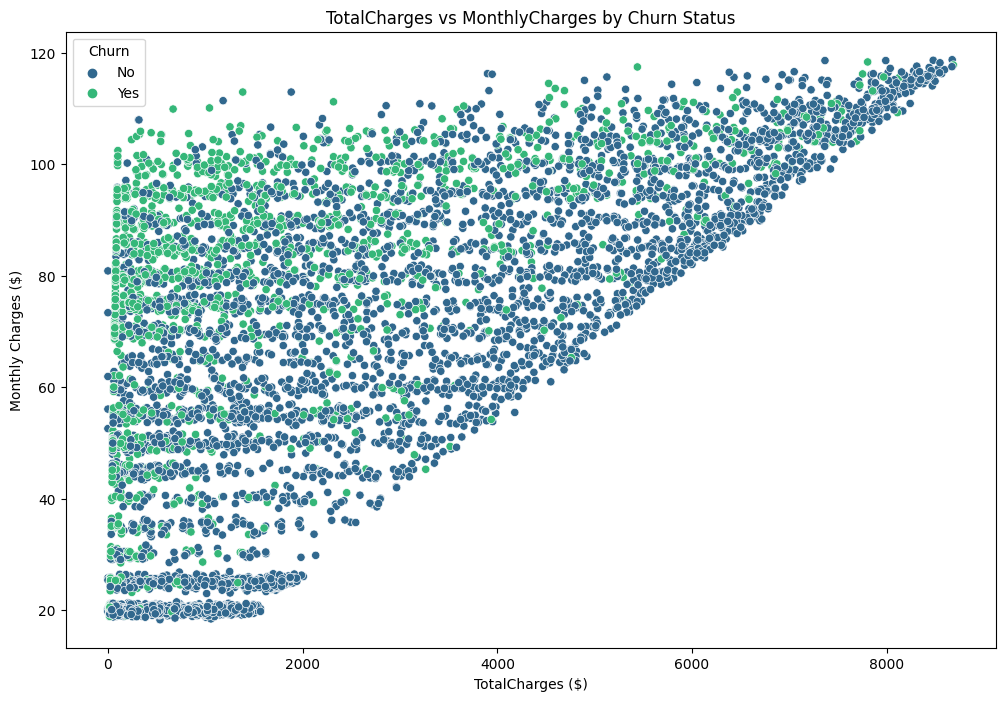

In [41]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='TotalCharges', y='MonthlyCharges', hue='Churn', palette='viridis')

# Add titles and labels
plt.title('TotalCharges vs MonthlyCharges by Churn Status')
plt.xlabel('TotalCharges ($)')
plt.ylabel('Monthly Charges ($)')

# Show the plot
plt.show()

We can observe that when total charges are low (i.e when the customer has used the product for long) and if the monthly charges are high, then they tend to churn.

In [42]:
churn_counts1 = df.groupby("InternetService")["Churn"].value_counts()
print(churn_counts1)


InternetService  Churn
DSL              No       1962
                 Yes       459
Fiber optic      No       1799
                 Yes      1297
No               No       1413
                 Yes       113
Name: count, dtype: int64


In [43]:
(1297 + 1799)/(1962 + 459 + 1799 + 1297 + 1413 + 113)

0.4395854039471816

In [44]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'Contract', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')

## Data Preprocessing

### Label encoding of Categorical features

In [45]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

finaldf = df.copy()

for feature in categorical_features:
    finaldf[feature] = le.fit_transform(finaldf[feature])

finaldf.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  \
0                0               0             2                 0   
1                0               2             0                 2   
2                0               2             2                 0   
3                0               2             0                 2   
4                1               0             0                 0   

   TechSupport  Contract  MonthlyCharges  TotalCharges  Churn  
0            0         0           29.85         29.85      0  
1            0         1           56.95       1889.50      0  
2            0         0           53.85        108.15      1  
3            2         1           42.30       1840.75      0  
4            0         0           70.70        151.65      1

In [46]:
dfe = finaldf.copy()

In [47]:
dfe.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'Contract', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')

In [48]:
dfe.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  \
0                0               0             2                 0   
1                0               2             0                 2   
2                0               2             2                 0   
3                0               2             0                 2   
4                1               0             0                 0   

   TechSupport  Contract  MonthlyCharges  TotalCharges  Churn  
0            0         0           29.85         29.85      0  
1            0         1           56.95       1889.50      0  
2            0         0           53.85        108.15      1  
3            2         1           42.30       1840.75      0  
4            0         0           70.70        151.65      1

We're all set up to start evaluating the models. It's worth mentioning that we should consider Precision, Recall and F1 Score as evaluation metrics, for the following reasons:

Precision will give us the proportion of positive identifications that were indeed correct. It can be defined as:

Precision=TruePositives/ TruePositives + FalsePositives 

Recall will determine the proportion of real positives that were correctly identified, and it can be defined as:

Recall=TruePositives / TruePositives + FalseNegatives

F1 Score is a metric that is useful when we need to seek a balance between precision and recall. The formula is defined as:

F1=2×Precision × Recall / Precision + Recall

Since our objective is to minimize company loss, predicting the risk of client churn, a good recall rate is desirable because we want to identify the maximum amount of clients that are indeed prone to stop subscribing, thus, we are pursuing a small number of False Negatives.

Additionally, we also seek to minimize the number of False Positives because we don't want clients to be mistakenly identified as churned. Therefore, a good precision rate is also desirable.

However, there is always a tradeoff between precision and recall. For this article, we chose to give more emphasis to recall, using it as our evaluation metric.



In [49]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score, classification_report

In [50]:
from sklearn.model_selection import train_test_split

X = dfe.drop(['Churn'], axis=1)
y = dfe['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from imblearn.over_sampling import SMOTE

oversample = SMOTE(k_neighbors=5)
X_smote, y_smote = oversample.fit_resample(X_train, y_train)
X_train, y_train = X_smote, y_smote

# Placeholder for results and reports
results = {}
classification_reports = {}
pres = {}
acc = {}

# Define transformers
log_transformer = Pipeline(steps=[
    ('log', PowerTransformer(method='yeo-johnson')),
])

# Scaling
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Models to evaluate
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

# Define pipelines for each combination (excluding Box-Cox)
pipelines = {
    'Log + Standard': Pipeline([
        ('log', log_transformer),
        ('scaler', standard_scaler)
    ]),
    'Log + MinMax': Pipeline([
        ('log', log_transformer),
        ('scaler', minmax_scaler)
    ])
}

# Apply each pipeline, train models, and evaluate recall score and classification report
for name, pipeline in pipelines.items():
    X_train_transformed = pipeline.fit_transform(X_train)
    X_test_transformed = pipeline.transform(X_test)
    
    for model_name, model in models.items():
        model.fit(X_train_transformed, y_train)
        y_pred = model.predict(X_test_transformed)
        
        # Calculate recall, precision, and accuracy scores
        recall = recall_score(y_test, y_pred)
        results[f'{name} + {model_name}'] = recall
        
        precision = precision_score(y_test, y_pred)
        pres[f'{name} + {model_name}'] = precision
        
        accuracy_scores = accuracy_score(y_test, y_pred)
        acc[f'{name} + {model_name}'] = accuracy_scores
        
        # Generate classification report
        report = classification_report(y_test, y_pred, output_dict=False)
        classification_reports[f'{name} + {model_name}'] = report

# Print the results and classification reports
for key, recall in results.items():
    print(f'{key}: Recall Score = {recall:.4f}')
    print(f'{key}: Precision Score = {pres[key]:.4f}')
    print(f'{key}: Accuracy Score = {acc[key]:.4f}')
    print(classification_reports[key])
    print('-' * 80)


Log + Standard + RandomForest: Recall Score = 0.5971
Log + Standard + RandomForest: Precision Score = 0.5924
Log + Standard + RandomForest: Accuracy Score = 0.7802
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1697
           1       0.59      0.60      0.59       628

    accuracy                           0.78      2325
   macro avg       0.72      0.72      0.72      2325
weighted avg       0.78      0.78      0.78      2325

--------------------------------------------------------------------------------
Log + Standard + LogisticRegression: Recall Score = 0.7850
Log + Standard + LogisticRegression: Precision Score = 0.5359
Log + Standard + LogisticRegression: Accuracy Score = 0.7583
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1697
           1       0.54      0.79      0.64       628

    accuracy                           0.76      2325
   macro avg       0.72     

### Log transformation of numerical features

In [51]:
Xl_train = X_train.copy()
Xl_test = X_test.copy()

Xl_train['tenure'] = np.log1p(X_train['tenure'])  
Xl_train['MonthlyCharges'] = np.log1p(X_train['MonthlyCharges'])
Xl_train['TotalCharges'] = np.log1p(X_train['TotalCharges'])


Xl_test['tenure'] = np.log1p(X_test['tenure'])  
Xl_test['MonthlyCharges'] = np.log1p(X_test['MonthlyCharges'])
Xl_test['TotalCharges'] = np.log1p(X_test['TotalCharges'])


In [52]:
X_train.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           1      40             1   
1       1              0        0           0      10             0   
2       0              0        0           0      27             1   
3       0              0        1           0       7             1   
4       1              0        1           1      65             1   

   InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  \
0                0               0             0                 2   
1                0               0             0                 2   
2                2               1             1                 1   
3                1               0             0                 0   
4                2               1             1                 1   

   TechSupport  Contract  MonthlyCharges  TotalCharges  
0            0         0           74.55       3015.75  
1            0         0           29.50        255.25  
2            1         1           19.15        501.35  
3            0         0           86.50        582.50  
4            1         2           24.75       1715.10

In [53]:
Xl_train.head()

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       1              0        1           1  3.713572             1   
1       1              0        0           0  2.397895             0   
2       0              0        0           0  3.332205             1   
3       0              0        1           0  2.079442             1   
4       1              0        1           1  4.189655             1   

   InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  \
0                0               0             0                 2   
1                0               0             0                 2   
2                2               1             1                 1   
3                1               0             0                 0   
4                2               1             1                 1   

   TechSupport  Contract  MonthlyCharges  TotalCharges  
0            0         0        4.324795      8.011935  
1            0         0        3.417727      5.546154  
2            1         1        3.003204      6.219297  
3            0         0        4.471639      6.369044  
4            1         2        3.248435      7.447810

### Box Cox Transformation 

In [54]:
from scipy import stats

Xb_train = X_train.copy()
Xb_test = X_test.copy()

# Transform and extract only the transformed data (first element of the tuple)
Xb_train['tenure'], _ = stats.boxcox(X_train['tenure'] + 1)  
Xb_train['MonthlyCharges'], _ = stats.boxcox(X_train['MonthlyCharges'] + 1)
Xb_train['TotalCharges'], _ = stats.boxcox(X_train['TotalCharges'] + 1)

Xb_test['tenure'], _ = stats.boxcox(X_test['tenure'] + 1)  
Xb_test['MonthlyCharges'], _ = stats.boxcox(X_test['MonthlyCharges'] + 1)
Xb_test['TotalCharges'], _ = stats.boxcox(X_test['TotalCharges'] + 1)


### Min Max 

In [55]:
from sklearn.preprocessing import MinMaxScaler

Xm_train = X_train.copy()
Xm_test = X_test.copy()

scaler = MinMaxScaler()
Xm_train[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(X_train[['tenure', 'MonthlyCharges', 'TotalCharges']])
Xm_test[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(X_test[['tenure', 'MonthlyCharges', 'TotalCharges']])


C:\Users\Srinidhi\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


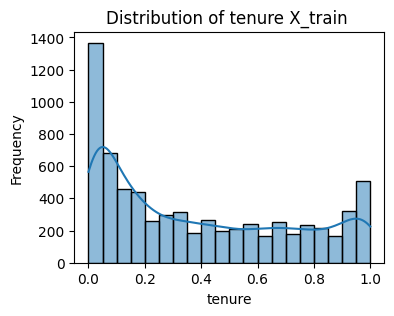

C:\Users\Srinidhi\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


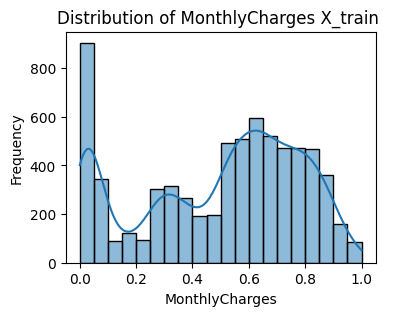

C:\Users\Srinidhi\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


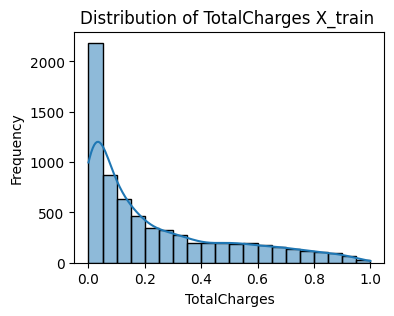

C:\Users\Srinidhi\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


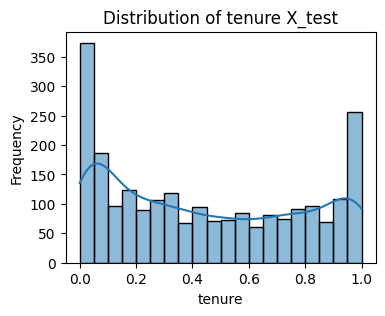

C:\Users\Srinidhi\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


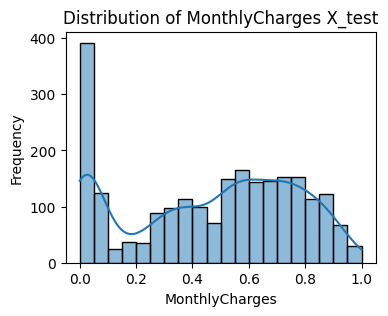

C:\Users\Srinidhi\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


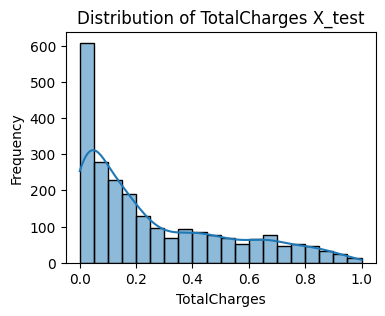

In [56]:

# Distribution of numerical features
numerical_features_m = ['tenure', 'MonthlyCharges', 'TotalCharges']
for feature in numerical_features_m:
    plt.figure(figsize=(4, 3))
    sns.histplot(Xm_train[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature} X_train ')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()
# frequency - no of datapoints falling in each bin of the histogram




# Distribution of numerical features
numerical_features_m = ['tenure', 'MonthlyCharges', 'TotalCharges']
for feature in numerical_features_m:
    plt.figure(figsize=(4, 3))
    sns.histplot(Xm_test[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature} X_test')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()
# frequency - no of datapoints falling in each bin of the histogram

### Standard

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Xs_train = X_train.copy()
Xs_test = X_test.copy()

Xs_train[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(X_train[['tenure', 'MonthlyCharges', 'TotalCharges']])
Xs_test[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(X_test[['tenure', 'MonthlyCharges', 'TotalCharges']])


C:\Users\Srinidhi\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


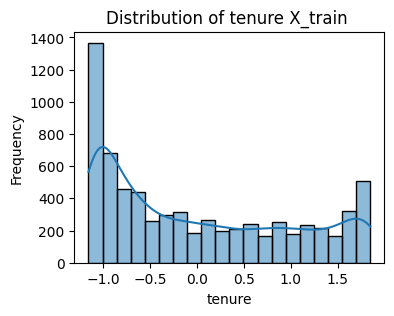

C:\Users\Srinidhi\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


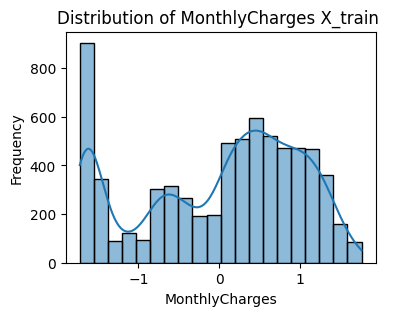

C:\Users\Srinidhi\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


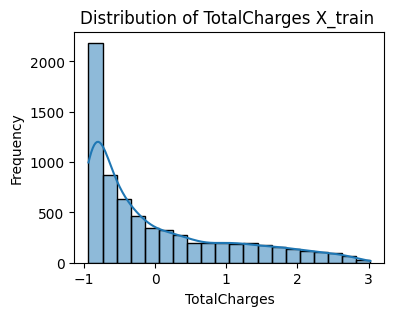

C:\Users\Srinidhi\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


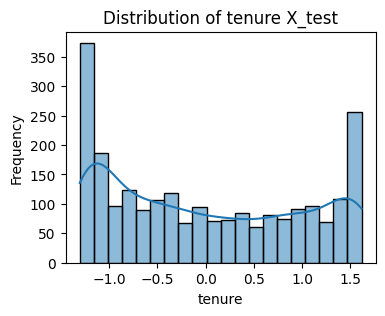

C:\Users\Srinidhi\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


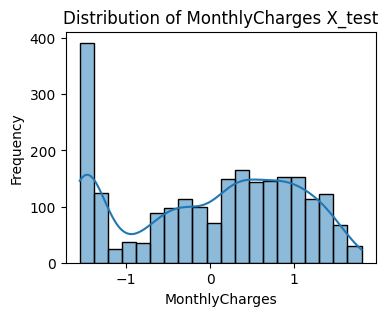

C:\Users\Srinidhi\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


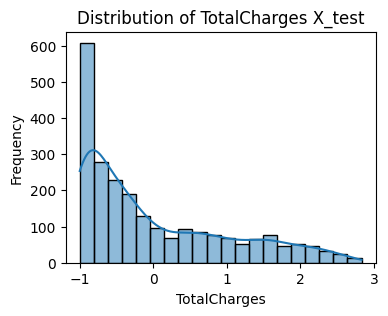

In [58]:

# Distribution of numerical features
numerical_features_s = ['tenure', 'MonthlyCharges', 'TotalCharges']
for feature in numerical_features_s:
    plt.figure(figsize=(4, 3))
    sns.histplot(Xs_train[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature} X_train ')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()
# frequency - no of datapoints falling in each bin of the histogram




# Distribution of numerical features
numerical_features_s = ['tenure', 'MonthlyCharges', 'TotalCharges']
for feature in numerical_features_s:
    plt.figure(figsize=(4, 3))
    sns.histplot(Xs_test[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature} X_test')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()
# frequency - no of datapoints falling in each bin of the histogram

### Min max Scaling with Log

In [59]:
from sklearn.preprocessing import MinMaxScaler

Xml_train = Xl_train.copy()
Xml_test = Xl_test.copy()

scaler = MinMaxScaler()
Xml_train[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(Xl_train[['tenure', 'MonthlyCharges', 'TotalCharges']])
Xml_test[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(Xl_test[['tenure', 'MonthlyCharges', 'TotalCharges']])


C:\Users\Srinidhi\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


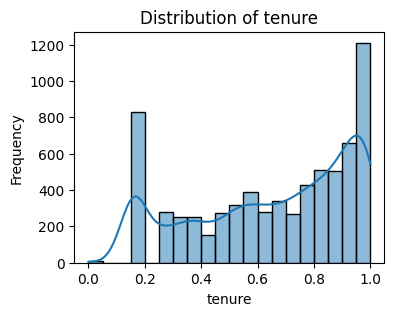

C:\Users\Srinidhi\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


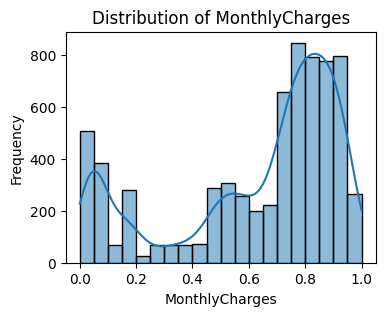

C:\Users\Srinidhi\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


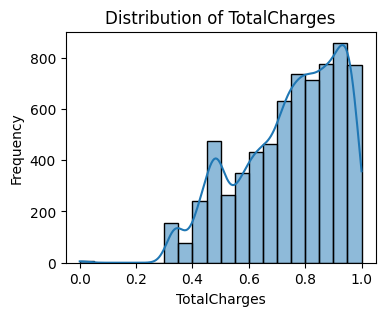

C:\Users\Srinidhi\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


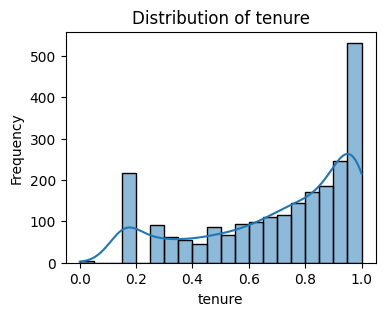

C:\Users\Srinidhi\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


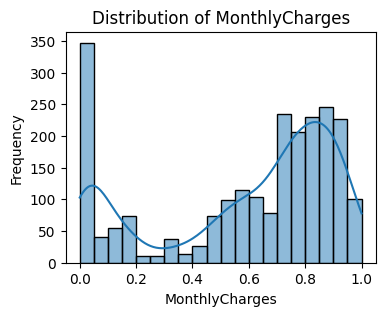

C:\Users\Srinidhi\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


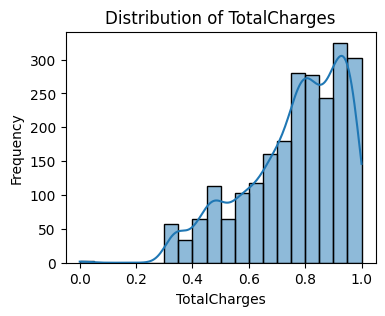

In [60]:

# Distribution of numerical features
numerical_features_lm = ['tenure', 'MonthlyCharges', 'TotalCharges']
for feature in numerical_features_lm:
    plt.figure(figsize=(4, 3))
    sns.histplot(Xml_train[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

    

# Distribution of numerical features
numerical_features_lm = ['tenure', 'MonthlyCharges', 'TotalCharges']
for feature in numerical_features_lm:
    plt.figure(figsize=(4, 3))
    sns.histplot(Xml_test[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

    


### Min Max Scaling with Box Cox

In [61]:
from sklearn.preprocessing import MinMaxScaler

Xmb_train = Xb_train.copy()
Xmb_test = Xb_test.copy()

scaler = MinMaxScaler()
Xmb_train[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(Xb_train[['tenure', 'MonthlyCharges', 'TotalCharges']])
Xmb_test[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(Xb_test[['tenure', 'MonthlyCharges', 'TotalCharges']])


C:\Users\Srinidhi\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


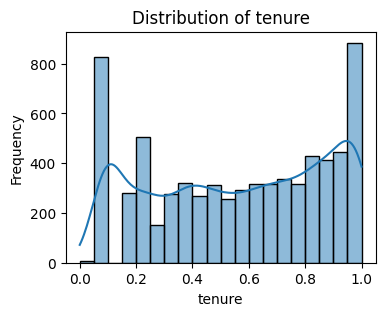

C:\Users\Srinidhi\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


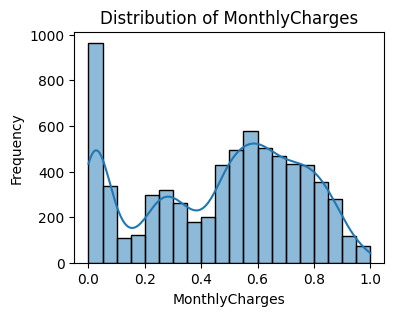

C:\Users\Srinidhi\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


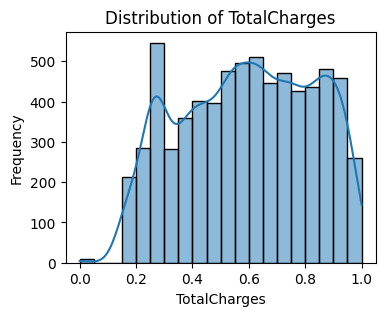

C:\Users\Srinidhi\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


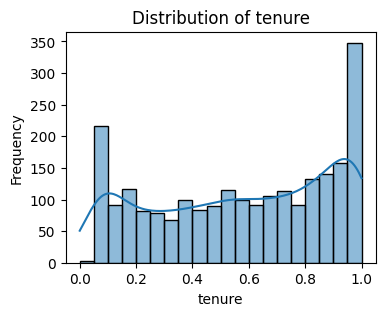

C:\Users\Srinidhi\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


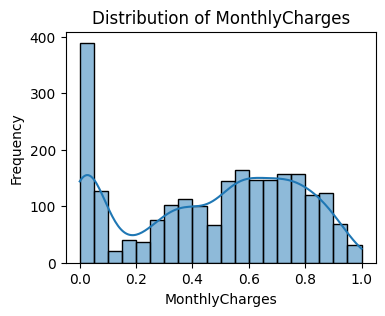

C:\Users\Srinidhi\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


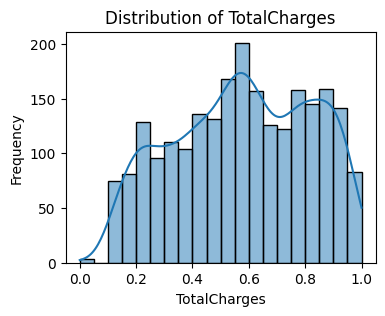

In [62]:

# Distribution of numerical features
numerical_features_bm = ['tenure', 'MonthlyCharges', 'TotalCharges']
for feature in numerical_features_bm:
    plt.figure(figsize=(4, 3))
    sns.histplot(Xmb_train[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

    

# Distribution of numerical features
numerical_features_bm = ['tenure', 'MonthlyCharges', 'TotalCharges']
for feature in numerical_features_bm:
    plt.figure(figsize=(4, 3))
    sns.histplot(Xmb_test[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

    


### Standard Scaling with log transform

In [63]:
from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()


Xsl_train = Xl_train.copy()
Xsl_test = Xl_test.copy()

Xsl_train[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler1.fit_transform(Xl_train[['tenure', 'MonthlyCharges', 'TotalCharges']])
Xsl_test[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler1.fit_transform(Xl_test[['tenure', 'MonthlyCharges', 'TotalCharges']])


C:\Users\Srinidhi\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


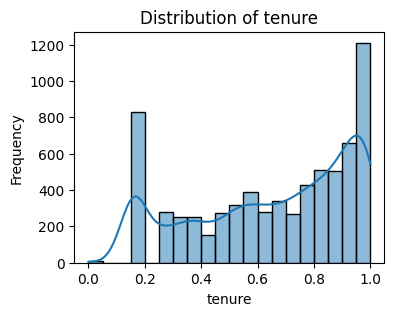

C:\Users\Srinidhi\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


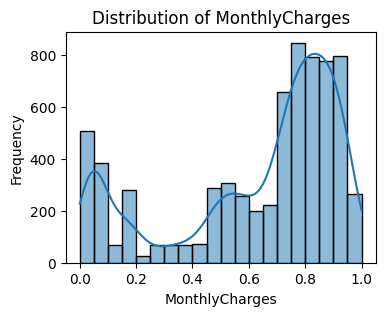

C:\Users\Srinidhi\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


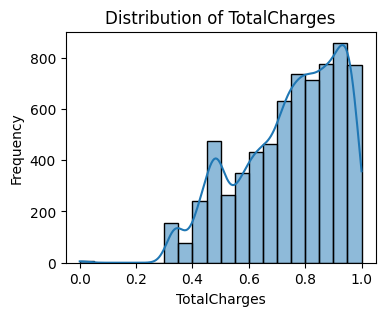

C:\Users\Srinidhi\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


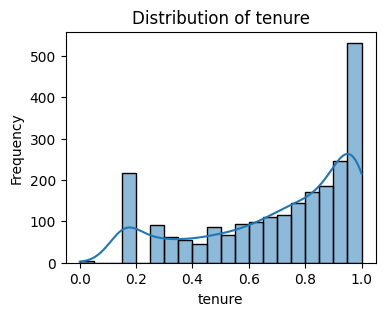

C:\Users\Srinidhi\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


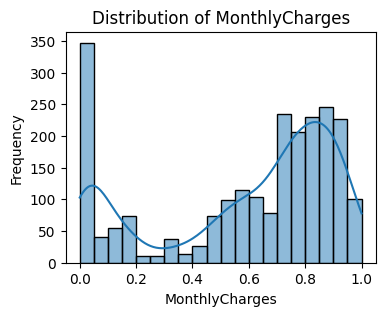

C:\Users\Srinidhi\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


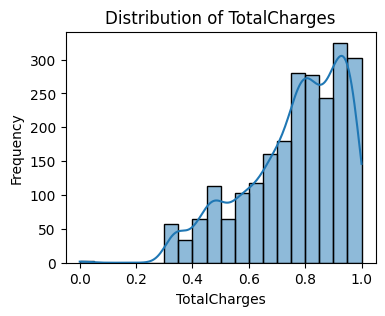

In [64]:

# Distribution of numerical features
numerical_features_lm = ['tenure', 'MonthlyCharges', 'TotalCharges']
for feature in numerical_features_lm:
    plt.figure(figsize=(4, 3))
    sns.histplot(Xml_train[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

    

# Distribution of numerical features
numerical_features_lm = ['tenure', 'MonthlyCharges', 'TotalCharges']
for feature in numerical_features_lm:
    plt.figure(figsize=(4, 3))
    sns.histplot(Xml_test[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

    


### Box Cox with Standard

In [65]:
Xsb_train = Xb_train.copy()
Xsb_test = Xb_test.copy()

Xsb_train[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler1.fit_transform(Xb_train[['tenure', 'MonthlyCharges', 'TotalCharges']])
Xsb_test[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler1.fit_transform(Xb_test[['tenure', 'MonthlyCharges', 'TotalCharges']])


C:\Users\Srinidhi\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


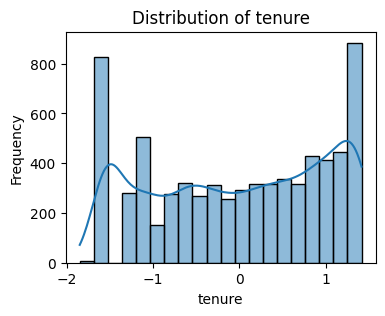

C:\Users\Srinidhi\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


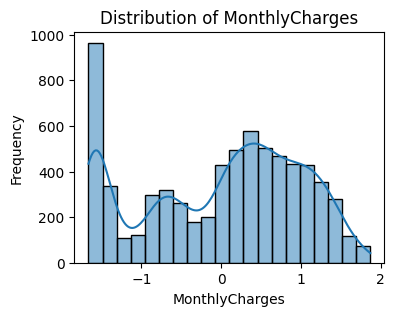

C:\Users\Srinidhi\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


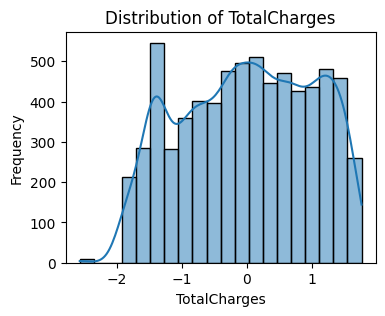

C:\Users\Srinidhi\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


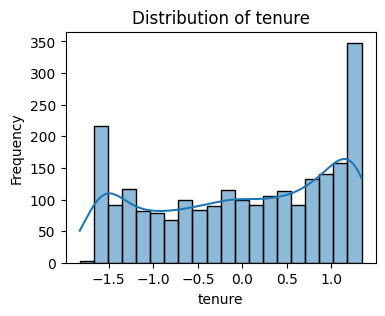

C:\Users\Srinidhi\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


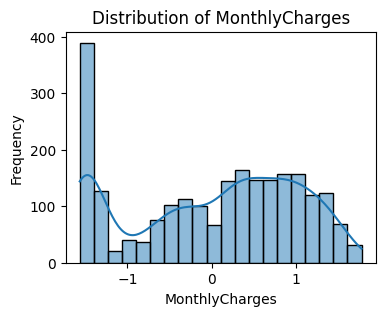

C:\Users\Srinidhi\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


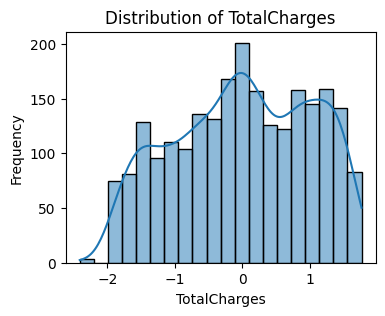

In [66]:

# Distribution of numerical features
numerical_features_bm = ['tenure', 'MonthlyCharges', 'TotalCharges']
for feature in numerical_features_bm:
    plt.figure(figsize=(4, 3))
    sns.histplot(Xsb_train[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

    

# Distribution of numerical features
numerical_features_bm = ['tenure', 'MonthlyCharges', 'TotalCharges']
for feature in numerical_features_bm:
    plt.figure(figsize=(4, 3))
    sns.histplot(Xsb_test[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

    


### for finaldf

In [67]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [68]:
from sklearn.metrics import accuracy_score

preds = rf.predict(X_test)
print(accuracy_score(preds,y_test))

0.7789247311827957


In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score, classification_report

preds_rf_df = rf.predict(X_test)

# Compute accuracy
accuracy_rf_df = accuracy_score(y_test, preds_rf_df)
print(f'Accuracy: {accuracy_rf_df:.2f}')

# Compute confusion matrix
conf_matrix_rf_df = confusion_matrix(y_test, preds_rf_df)
print('Confusion Matrix:')
print(conf_matrix_rf_df)

precision_rf_df = precision_score(y_test, preds_rf_df, average='binary')  
recall_rf_df = recall_score(y_test, preds_rf_df)
classification_report_df = classification_report(y_test, preds_rf_df)
print(f'classification report:', classification_report_df)
print(f'Precision Score: {precision_rf_df:.2f}')
print(f'Recall Score: {recall_rf_df:.2f}')




Accuracy: 0.78
Confusion Matrix:
[[1436  261]
 [ 253  375]]
classification report:               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1697
           1       0.59      0.60      0.59       628

    accuracy                           0.78      2325
   macro avg       0.72      0.72      0.72      2325
weighted avg       0.78      0.78      0.78      2325

Precision Score: 0.59
Recall Score: 0.60


### For min max

In [72]:
rf.fit(Xm_train,y_train)

RandomForestClassifier(random_state=42)

In [73]:

preds_rf_dfm = rf.predict(Xm_test)

# Compute accuracy
accuracy_rf_dfm = accuracy_score(y_test, preds_rf_dfm)
print(f'Accuracy: {accuracy_rf_dfm:.2f}')

# Compute confusion matrix
conf_matrix_rf_dfm = confusion_matrix(y_test, preds_rf_dfm)
print('Confusion Matrix:')
print(conf_matrix_rf_dfm)

precision_rf_dfm = precision_score(y_test, preds_rf_dfm, average='binary')  
recall_rf_dfm = recall_score(y_test, preds_rf_dfm)
classification_report_dfm = classification_report(y_test, preds_rf_dfm)
print(f'classification report:', classification_report_dfm)

print(f'Precision Score: {precision_rf_dfm:.2f}')
print(f'Recall Score: {recall_rf_dfm:.2f}')



Accuracy: 0.78
Confusion Matrix:
[[1432  265]
 [ 254  374]]
classification report:               precision    recall  f1-score   support

           0       0.85      0.84      0.85      1697
           1       0.59      0.60      0.59       628

    accuracy                           0.78      2325
   macro avg       0.72      0.72      0.72      2325
weighted avg       0.78      0.78      0.78      2325

Precision Score: 0.59
Recall Score: 0.60


### For dfs

In [74]:
rf.fit(Xs_train,y_train)

RandomForestClassifier(random_state=42)

In [75]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score

preds_rf_dfs = rf.predict(Xs_test)

# Compute accuracy
accuracy_rf_dfs = accuracy_score(y_test, preds_rf_dfs)
print(f'Accuracy: {accuracy_rf_dfs:.2f}')

# Compute confusion matrix
conf_matrix_rf_dfs = confusion_matrix(y_test, preds_rf_dfs)
print('Confusion Matrix:')
print(conf_matrix_rf_dfs)

precision_rf_dfs = precision_score(y_test, preds_rf_dfs, average='binary')  
recall_rf_dfs = recall_score(y_test, preds_rf_dfs)
classification_report_dfs = classification_report(y_test, preds_rf_dfs)
print(f'classification report:', classification_report_dfs)

print(f'Precision Score: {precision_rf_dfs:.2f}')
print(f'Recall Score: {recall_rf_dfs:.2f}')



Accuracy: 0.77
Confusion Matrix:
[[1383  314]
 [ 225  403]]
classification report:               precision    recall  f1-score   support

           0       0.86      0.81      0.84      1697
           1       0.56      0.64      0.60       628

    accuracy                           0.77      2325
   macro avg       0.71      0.73      0.72      2325
weighted avg       0.78      0.77      0.77      2325

Precision Score: 0.56
Recall Score: 0.64


### for dflm

In [76]:
rf.fit(Xml_train,y_train)

RandomForestClassifier(random_state=42)

In [77]:

preds_rf_dflm = rf.predict(Xml_test)

# Compute accuracy
accuracy_rf_dflm = accuracy_score(y_test, preds_rf_dflm)
print(f'Accuracy: {accuracy_rf_dflm:.2f}')

# Compute confusion matrix
conf_matrix_rf_dflm = confusion_matrix(y_test, preds_rf_dflm)
print('Confusion Matrix:')
print(conf_matrix_rf_dflm)

precision_rf_dflm = precision_score(y_test, preds_rf_dflm, average='binary')  
recall_rf_dflm = recall_score(y_test, preds_rf_dflm)
classification_report_dfml = classification_report(y_test, preds_rf_dflm)
print(f'classification report:', classification_report_dfml)
print(f'Precision Score: {precision_rf_dflm:.2f}')
print(f'Recall Score: {recall_rf_dflm:.2f}')



Accuracy: 0.78
Confusion Matrix:
[[1433  264]
 [ 256  372]]
classification report:               precision    recall  f1-score   support

           0       0.85      0.84      0.85      1697
           1       0.58      0.59      0.59       628

    accuracy                           0.78      2325
   macro avg       0.72      0.72      0.72      2325
weighted avg       0.78      0.78      0.78      2325

Precision Score: 0.58
Recall Score: 0.59


### for dfls

In [78]:
rf.fit(Xsl_train,y_train)

RandomForestClassifier(random_state=42)

In [79]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score

preds_rf_dfls = rf.predict(Xsl_test)

# Compute accuracy
accuracy_rf_dfls = accuracy_score(y_test, preds_rf_dfls)
print(f'Accuracy: {accuracy_rf_dfls:.2f}')

# Compute confusion matrix
conf_matrix_rf_dfls = confusion_matrix(y_test, preds_rf_dfls)
print('Confusion Matrix:')
print(conf_matrix_rf_dfls)

precision_rf_dfls = precision_score(y_test, preds_rf_dfls, average='binary')  
recall_rf_dfls = recall_score(y_test, preds_rf_dfls)
classification_report_dfls = classification_report(y_test, preds_rf_dfls)
print(f'classification report:', classification_report_dfls)
print(f'Precision Score: {precision_rf_dfls:.2f}')
print(f'Recall Score: {recall_rf_dfls:.2f}')



Accuracy: 0.77
Confusion Matrix:
[[1372  325]
 [ 219  409]]
classification report:               precision    recall  f1-score   support

           0       0.86      0.81      0.83      1697
           1       0.56      0.65      0.60       628

    accuracy                           0.77      2325
   macro avg       0.71      0.73      0.72      2325
weighted avg       0.78      0.77      0.77      2325

Precision Score: 0.56
Recall Score: 0.65


### for dfbm

In [80]:
rf.fit(Xmb_train,y_train)

RandomForestClassifier(random_state=42)

In [83]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score

preds_rf_dfbm = rf.predict(Xmb_test)

# Compute accuracy
accuracy_rf_dfbm = accuracy_score(y_test, preds_rf_dfbm)
print(f'Accuracy: {accuracy_rf_dfbm:.2f}')

# Compute confusion matrix
conf_matrix_rf_dfbm = confusion_matrix(y_test, preds_rf_dfbm)
print('Confusion Matrix:')
print(conf_matrix_rf_dfbm)

precision_rf_dfbm = precision_score(y_test, preds_rf_dfbm, average='binary')  
recall_rf_dfbm = recall_score(y_test, preds_rf_dfbm)
classification_report_dfbm = classification_report(y_test, preds_rf_dfbm)
print(f'classification report:', classification_report_dfbm)
print(f'Precision Score: {precision_rf_dfbm :.2f}')
print(f'Recall Score: {recall_rf_dfbm:.2f}')



Accuracy: 0.77
Confusion Matrix:
[[1376  321]
 [ 209  419]]
classification report:               precision    recall  f1-score   support

           0       0.87      0.81      0.84      1697
           1       0.57      0.67      0.61       628

    accuracy                           0.77      2325
   macro avg       0.72      0.74      0.73      2325
weighted avg       0.79      0.77      0.78      2325

Precision Score: 0.57
Recall Score: 0.67


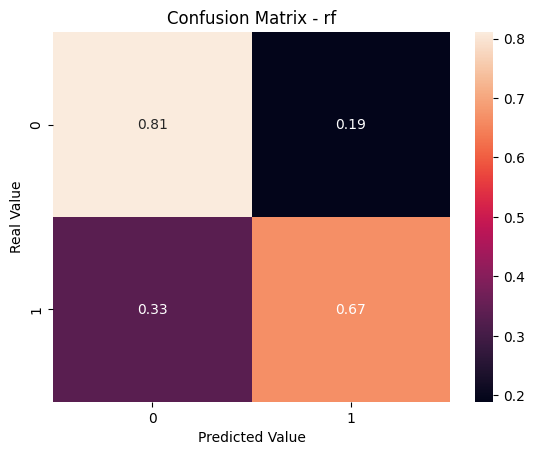

In [120]:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, preds_rf_dfbm, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix - rf')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Real Value')

plt.show()

### for dfbs

In [84]:
rf.fit(Xsb_train,y_train)

RandomForestClassifier(random_state=42)

In [86]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score

preds_rf_dfbs = rf.predict(Xsb_test)

# Compute accuracy
accuracy_rf_dfbs = accuracy_score(y_test, preds_rf_dfbs)
print(f'Accuracy: {accuracy_rf_dfbs:.2f}')

# Compute confusion matrix
conf_matrix_rf_dfbs = confusion_matrix(y_test, preds_rf_dfbs)
print('Confusion Matrix:')
print(conf_matrix_rf_dfbs)

precision_rf_dfbs = precision_score(y_test, preds_rf_dfbs, average='binary')  
recall_rf_dfbs = recall_score(y_test, preds_rf_dfbs)
classification_report_dfbs = classification_report(y_test, preds_rf_dfbs)
print(f'classification report:', classification_report_dfbs)
print(f'Precision Score: {precision_rf_dfbs:.2f}')
print(f'Recall Score: {recall_rf_dfbs :.2f}')



Accuracy: 0.77
Confusion Matrix:
[[1365  332]
 [ 214  414]]
classification report:               precision    recall  f1-score   support

           0       0.86      0.80      0.83      1697
           1       0.55      0.66      0.60       628

    accuracy                           0.77      2325
   macro avg       0.71      0.73      0.72      2325
weighted avg       0.78      0.77      0.77      2325

Precision Score: 0.55
Recall Score: 0.66


## Logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score


lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

preds_lr = lr.predict(X_test)
print(accuracy_score(preds_lr,y_test))
accuracy_lr = accuracy_score(y_test, preds_lr)
print(f'Accuracy: {accuracy_lr:.2f}')

# Compute confusion matrix
conf_matrix_lr = confusion_matrix(y_test, preds_lr)
print('Confusion Matrix:')
print(conf_matrix_lr)

precision_lr = precision_score(y_test, preds_lr, average='binary')  
recall_lr = recall_score(y_test, preds_lr)
classification_report_lr = classification_report(y_test, preds_lr)
print(f'classification report:', classification_report_lr)
print(f'Precision Score: {precision_lr:.2f}')
print(f'Recall Score: {recall_lr:.2f}')

0.7582795698924731
Accuracy: 0.76
Confusion Matrix:
[[1290  407]
 [ 155  473]]
classification report:               precision    recall  f1-score   support

           0       0.89      0.76      0.82      1697
           1       0.54      0.75      0.63       628

    accuracy                           0.76      2325
   macro avg       0.72      0.76      0.72      2325
weighted avg       0.80      0.76      0.77      2325

Precision Score: 0.54
Recall Score: 0.75


C:\Users\Srinidhi\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score


lr.fit(Xs_train, y_train)

preds_lr_dfs = lr.predict(Xs_test)

accuracy_lr_dfs = accuracy_score(y_test, preds_lr_dfs)
print(f'Accuracy: {accuracy_lr_dfs:.2f}')

# Compute confusion matrix
conf_matrix_lr_dfs = confusion_matrix(y_test, preds_lr_dfs)
print('Confusion Matrix:')
print(conf_matrix_lr_dfs)

precision_lr_dfs = precision_score(y_test, preds_lr_dfs, average='binary')  
recall_lr_dfs = recall_score(y_test, preds_lr_dfs)
classification_report_lrs = classification_report(y_test, preds_lr_dfs)
print(f'classification report:', classification_report_lrs)
print(f'Precision Score: {precision_lr_dfs:.2f}')
print(f'Recall Score: {recall_lr_dfs:.2f}')

Accuracy: 0.74
Confusion Matrix:
[[1202  495]
 [ 112  516]]
classification report:               precision    recall  f1-score   support

           0       0.91      0.71      0.80      1697
           1       0.51      0.82      0.63       628

    accuracy                           0.74      2325
   macro avg       0.71      0.76      0.71      2325
weighted avg       0.81      0.74      0.75      2325

Precision Score: 0.51
Recall Score: 0.82


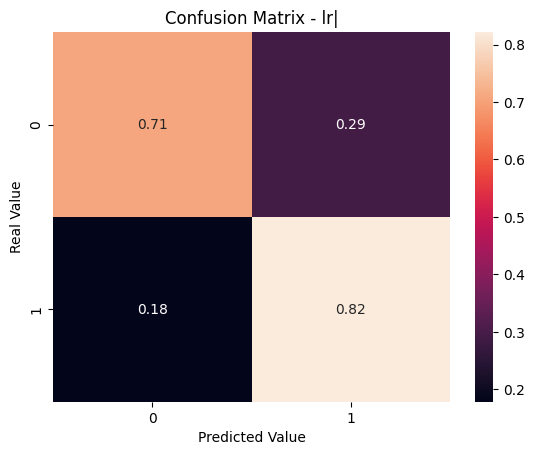

In [121]:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, preds_lr_dfs, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix - lr|')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Real Value')

plt.show()

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score


lr.fit(Xm_train, y_train)

preds_lr_dfm = lr.predict(Xm_test)
accuracy_lr_dfm = accuracy_score(y_test, preds_lr_dfm)
print(f'Accuracy: {accuracy_lr_dfm:.2f}')

# Compute confusion matrix
conf_matrix_lr_dfm  = confusion_matrix(y_test, preds_lr_dfm)
print('Confusion Matrix:')
print(conf_matrix_lr_dfm)

precision_lr_dfm = precision_score(y_test, preds_lr_dfm, average='binary')  
recall_lr_dfm = recall_score(y_test, preds_lr_dfm)
classification_report_lrm = classification_report(y_test, preds_lr_dfm)
print(f'classification report:', classification_report_lrm)
print(f'Precision Score: {precision_lr_dfm:.2f}')
print(f'Recall Score: {recall_lr_dfm:.2f}')

Accuracy: 0.76
Confusion Matrix:
[[1273  424]
 [ 142  486]]
classification report:               precision    recall  f1-score   support

           0       0.90      0.75      0.82      1697
           1       0.53      0.77      0.63       628

    accuracy                           0.76      2325
   macro avg       0.72      0.76      0.73      2325
weighted avg       0.80      0.76      0.77      2325

Precision Score: 0.53
Recall Score: 0.77


In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score


lr.fit(Xml_train, y_train)

preds_lr_dflm = lr.predict(Xml_test)
accuracy_lr_dflm = accuracy_score(y_test, preds_lr_dflm)
print(f'Accuracy: {accuracy_lr_dflm:.2f}')

# Compute confusion matrix
conf_matrix_lr_dflm = confusion_matrix(y_test, preds_lr_dflm)
print('Confusion Matrix:')
print(conf_matrix_lr_dflm)

precision_lr_dflm = precision_score(y_test, preds_lr_dflm, average='binary')  
recall_lr_dflm = recall_score(y_test, preds_lr_dflm)
classification_report_lrml = classification_report(y_test, preds_lr_dflm)
print(f'classification report:', classification_report_lrml)
print(f'Precision Score: {precision_lr_dflm:.2f}')
print(f'Recall Score: {recall_lr_dflm:.2f}')

Accuracy: 0.76
Confusion Matrix:
[[1282  415]
 [ 140  488]]
classification report:               precision    recall  f1-score   support

           0       0.90      0.76      0.82      1697
           1       0.54      0.78      0.64       628

    accuracy                           0.76      2325
   macro avg       0.72      0.77      0.73      2325
weighted avg       0.80      0.76      0.77      2325

Precision Score: 0.54
Recall Score: 0.78


In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score


lr.fit(Xsl_train, y_train)

preds_lr_dfls = lr.predict(Xsl_test)
accuracy_lr_dfls = accuracy_score(y_test, preds_lr_dfls)
print(f'Accuracy: {accuracy_lr_dfls:.2f}')

# Compute confusion matrix
conf_matrix_lr_dfls = confusion_matrix(y_test, preds_lr_dfls)
print('Confusion Matrix:')
print(conf_matrix_lr_dfls)

precision_lr_dfls = precision_score(y_test, preds_lr_dfls, average='binary')  
recall_lr_dfls = recall_score(y_test, preds_lr_dfls)
classification_report_lrls = classification_report(y_test, preds_lr_dfls)
print(f'classification report:',classification_report_lrls)
print(f'Precision Score: {precision_lr_dfls:.2f}')
print(f'Recall Score: {recall_lr_dfls:.2f}')

Accuracy: 0.75
Confusion Matrix:
[[1224  473]
 [ 119  509]]
classification report:               precision    recall  f1-score   support

           0       0.91      0.72      0.81      1697
           1       0.52      0.81      0.63       628

    accuracy                           0.75      2325
   macro avg       0.71      0.77      0.72      2325
weighted avg       0.81      0.75      0.76      2325

Precision Score: 0.52
Recall Score: 0.81


In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score


lr.fit(Xmb_train, y_train)

preds_lr_dfbm = lr.predict(Xmb_test)
accuracy_lr_dfbm = accuracy_score(y_test, preds_lr_dfbm)
print(f'Accuracy: {accuracy_lr_dfbm:.2f}')

# Compute confusion matrix
conf_matrix_lr_dfbm = confusion_matrix(y_test, preds_lr_dfbm)
print('Confusion Matrix:')
print(conf_matrix_lr_dfbm)

precision_lr_dfbm = precision_score(y_test, preds_lr_dfbm, average='binary')  
recall_lr_dfbm = recall_score(y_test, preds_lr_dfbm)
classification_report_lrmb = classification_report(y_test, preds_lr_dfbm)
print(f'classification report:',classification_report_lrmb)
print(f'Precision Score: {precision_lr_dfbm:.2f}')
print(f'Recall Score: {recall_lr_dfbm:.2f}')

Accuracy: 0.75
Confusion Matrix:
[[1223  474]
 [ 117  511]]
classification report:               precision    recall  f1-score   support

           0       0.91      0.72      0.81      1697
           1       0.52      0.81      0.63       628

    accuracy                           0.75      2325
   macro avg       0.72      0.77      0.72      2325
weighted avg       0.81      0.75      0.76      2325

Precision Score: 0.52
Recall Score: 0.81


In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score


lr.fit(Xsb_train, y_train)

preds_lr_dfbs = lr.predict(Xsb_test)
print(accuracy_score(preds_lr_dfbs,y_test))
accuracy_lr_dfbs = accuracy_score(y_test, preds_lr_dfbs)
print(f'Accuracy: {accuracy_lr_dfbs:.2f}')

# Compute confusion matrix
conf_matrix_lr_dfbs = confusion_matrix(y_test, preds_lr_dfbs)
print('Confusion Matrix:')
print(conf_matrix_lr_dfbs)

precision_lr_dfbs = precision_score(y_test, preds_lr_dfbs, average='binary')  
recall_lr_dfbs = recall_score(y_test, preds_lr_dfbs)
classification_report_lrbs = classification_report(y_test, preds_lr_dfbs)
print(f'classification report:',classification_report_lrbs)
print(f'Precision Score: {precision_lr_dfbs:.2f}')
print(f'Recall Score: {recall_lr_dfbs:.2f}')

0.7470967741935484
Accuracy: 0.75
Confusion Matrix:
[[1229  468]
 [ 120  508]]
classification report:               precision    recall  f1-score   support

           0       0.91      0.72      0.81      1697
           1       0.52      0.81      0.63       628

    accuracy                           0.75      2325
   macro avg       0.72      0.77      0.72      2325
weighted avg       0.81      0.75      0.76      2325

Precision Score: 0.52
Recall Score: 0.81


From this we can understand that the recall score is higher when we do box cox transformation and standard scaling. 

To increase the number of people who wouldn't churn, we need to prioritize recall (sensitivity) in our churn prediction model. This is because we want to identify and retain as many customers who are at risk of churning as possible. A model with high recall will ensure that you capture most of the churners, even if it means you may have some false positives.



In [97]:
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error, accuracy_score, roc_auc_score, r2_score, mean_absolute_percentage_error

# y_pred_logreg, y_pred_dt, y_pred_rf, y_pred_svm, y_pred_knn, y_pred_lr are the predicted values for each model


f1_rf_df = f1_score(y_test, preds_rf_df)
f1_rf_dfm = f1_score(y_test, preds_rf_dfm)
f1_rf_dfs = f1_score(y_test, preds_rf_dfs)
f1_rf_dflm = f1_score(y_test, preds_rf_dflm)
f1_rf_dfls = f1_score(y_test, preds_rf_dfls)
f1_rf_dfbm = f1_score(y_test, preds_rf_dfbm)
f1_rf_dfbs = f1_score(y_test, preds_rf_dfbs)

#f1_xgb_dfbs = f1_score(ybs_test, ybs_pred)




f1_lr_df = f1_score(y_test, preds_lr)
f1_lr_dfm = f1_score(y_test, preds_lr_dfm)
f1_lr_dfs = f1_score(y_test, preds_lr_dfs)
f1_lr_dflm = f1_score(y_test, preds_lr_dflm)
f1_lr_dfls = f1_score(y_test, preds_lr_dfls)
f1_lr_dfbm = f1_score(y_test, preds_lr_dfbm)
f1_lr_dfbs = f1_score(y_test, preds_lr_dfbs)

mse_rf_df = mean_squared_error(y_test, preds_rf_df)
mse_rf_dfm = mean_squared_error(y_test, preds_rf_dfm)
mse_rf_dfs= mean_squared_error(y_test, preds_rf_dfs)
mse_rf_dflm= mean_squared_error(y_test, preds_rf_dflm)
mse_rf_dfls = mean_squared_error(y_test, preds_rf_dfls)
mse_rf_dfbm = mean_squared_error(y_test, preds_rf_dfbm)
mse_rf_dfbs = mean_squared_error(y_test, preds_rf_dfbs)


#mse_xgb_dfbs = mean_squared_error(ybs_test, ybs_pred)



mse_lr_df = mean_squared_error(y_test, preds_lr)
mse_lr_dfm = mean_squared_error(y_test, preds_lr_dfm)
mse_lr_dfs= mean_squared_error(y_test, preds_lr_dfs)
mse_lr_dflm= mean_squared_error(y_test, preds_lr_dflm)
mse_lr_dfls = mean_squared_error(y_test, preds_lr_dfls)
mse_lr_dfbm = mean_squared_error(y_test, preds_lr_dfbm)
mse_lr_dfbs = mean_squared_error(y_test, preds_lr_dfbs)



roc_auc_rf_df = roc_auc_score(y_test, preds_rf_df)
roc_auc_rf_dfm = roc_auc_score(y_test, preds_rf_dfm)
roc_auc_rf_dfs= roc_auc_score(y_test, preds_rf_dfs)
roc_auc_rf_dflm= roc_auc_score(y_test, preds_rf_dflm)
roc_auc_rf_dfls = roc_auc_score(y_test, preds_rf_dfls)
roc_auc_rf_dfbm = roc_auc_score(y_test, preds_rf_dfbm)
roc_auc_rf_dfbs = roc_auc_score(y_test, preds_rf_dfbs)

#roc_auc_xgb_dfbs = roc_auc_score(ybs_test, ybs_pred)


roc_auc_lr_df = roc_auc_score(y_test, preds_lr)
roc_auc_lr_dfm = roc_auc_score(y_test, preds_lr_dfm)
roc_auc_lr_dfs= roc_auc_score(y_test, preds_lr_dfs)
roc_auc_lr_dflm= roc_auc_score(y_test, preds_lr_dflm)
roc_auc_lr_dfls = roc_auc_score(y_test, preds_lr_dfls)
roc_auc_lr_dfbm = roc_auc_score(y_test, preds_lr_dfbm)
roc_auc_lr_dfbs = roc_auc_score(y_test, preds_lr_dfbs)


#precision_xgb_dfbs = precision_score(ybs_test, ybs_pred, average='binary')  
#accuracy_xgb_dfbs = accuracy_score(ybs_test, ybs_pred)
#conf_matrix_xgb_dfbs = confusion_matrix(ybs_test, ybs_pred)
#recall_xgb_dfbs = recall_score(ybs_test, ybs_pred)


# Print the metrics for each model
print("Logistic Regression Metrics df:")
print(f"Precision: {precision_lr}")
print(f"Recall: {recall_lr}")
print(f"F1-score: {f1_lr_df}")
print(f"MSE: {mse_lr_df}")
print(f"Accuracy: {accuracy_lr}")
print(f"ROC-AUC: {roc_auc_lr_df}")




print("\nLogistic Regression Metrics dfm:")
print(f"Precision: {precision_lr_dfm}")
print(f"Recall: {recall_lr_dfm}")
print(f"F1-score: {f1_lr_dfm}")
print(f"MSE: {mse_lr_dfm}")
print(f"Accuracy: {accuracy_lr_dfm}")
print(f"ROC-AUC: {roc_auc_lr_dfm}")


print("\nLogistic Regression Metrics dfs:")
print(f"Precision: {precision_lr_dfs}")
print(f"Recall: {recall_lr_dfs}")
print(f"F1-score: {f1_lr_dfs}")
print(f"MSE: {mse_lr_dfs}")
print(f"Accuracy: {accuracy_lr_dfs}")
print(f"ROC-AUC: {roc_auc_lr_dfs}")


print("\nLogistic Regression Metrics dflm:")
print(f"Precision: {precision_lr_dflm}")
print(f"Recall: {recall_lr_dflm}")
print(f"F1-score: {f1_lr_dflm}")
print(f"MSE: {mse_lr_dflm}")
print(f"Accuracy: {accuracy_lr_dflm}")
print(f"ROC-AUC: {roc_auc_lr_dflm}")


print("\nLogistic Regression Metrics dfls:")
print(f"Precision: {precision_lr_dfls}")
print(f"Recall: {recall_lr_dfls}")
print(f"F1-score: {f1_lr_dfls}")
print(f"MSE: {mse_lr_dfls}")
print(f"Accuracy: {accuracy_lr_dfls}")
print(f"ROC-AUC: {roc_auc_lr_dfls}")


print("\nLogistic Regression Metrics dfbm:")
print(f"Precision: {precision_lr_dfbm}")
print(f"Recall: {recall_lr_dfbm}")
print(f"F1-score: {f1_lr_dfbm}")
print(f"MSE: {mse_lr_dfbm}")
print(f"Accuracy: {accuracy_lr_dfbm}")
print(f"ROC-AUC: {roc_auc_lr_dfbm}")

print("\nLogistic Regression Metrics dfbs:")
print(f"Precision: {precision_lr_dfbs}")
print(f"Recall: {recall_lr_dfbs}")
print(f"F1-score: {f1_lr_dfbs}")
print(f"MSE: {mse_lr_dfbs}")
print(f"Accuracy: {accuracy_lr_dfbs}")
print(f"ROC-AUC: {roc_auc_lr_dfbs}")


print("\n\n")

print("\nRandom Forest Metrics df:")
print(f"Precision: {precision_rf_df}")
print(f"Recall: {recall_rf_df}")
print(f"F1-score: {f1_rf_df}")
print(f"MSE: {mse_rf_df}")
print(f"Accuracy: {accuracy_rf_df}")
print(f"ROC-AUC: {roc_auc_rf_df}")


print("\nRandom Forest Metrics dfm:")
print(f"Precision: {precision_rf_dfm}")
print(f"Recall: {recall_rf_dfm}")
print(f"F1-score: {f1_rf_dfm}")
print(f"MSE: {mse_rf_dfm}")
print(f"Accuracy: {accuracy_rf_dfm}")
print(f"ROC-AUC: {roc_auc_rf_dfm}")


print("\nRandom Forest Metrics dfs:")
print(f"Precision: {precision_rf_dfs}")
print(f"Recall: {recall_rf_dfs}")
print(f"F1-score: {f1_rf_dfs}")
print(f"MSE: {mse_rf_dfs}")
print(f"Accuracy: {accuracy_rf_dfs}")
print(f"ROC-AUC: {roc_auc_rf_dfs}")


print("\nRandom Forest Metrics dflm:")
print(f"Precision: {precision_rf_dflm}")
print(f"Recall: {recall_rf_dflm}")
print(f"F1-score: {f1_rf_dflm}")
print(f"MSE: {mse_rf_dflm}")
print(f"Accuracy: {accuracy_rf_dflm}")
print(f"ROC-AUC: {roc_auc_rf_dflm}")


print("\nRandom Forest Metrics dfls:")
print(f"Precision: {precision_rf_dfls}")
print(f"Recall: {recall_rf_dfls}")
print(f"F1-score: {f1_rf_dfls}")
print(f"MSE: {mse_rf_dfls}")
print(f"Accuracy: {accuracy_rf_dfls}")
print(f"ROC-AUC: {roc_auc_rf_dfls}")



print("\nRandom Forest Metrics dfbm:")
print(f"Precision: {precision_rf_dfbm}")
print(f"Recall: {recall_rf_dfbm}")
print(f"F1-score: {f1_rf_dfbm}")
print(f"MSE: {mse_rf_dfbm}")
print(f"Accuracy: {accuracy_rf_dfbm}")
print(f"ROC-AUC: {roc_auc_rf_dfbm}")



print("\nRandom Forest Metrics dfbs:")
print(f"Precision: {precision_rf_dfbs}")
print(f"Recall: {recall_rf_dfbs}")
print(f"F1-score: {f1_rf_dfbs}")
print(f"MSE: {mse_rf_dfbs}")
print(f"Accuracy: {accuracy_rf_dfbs}")
print(f"ROC-AUC: {roc_auc_rf_dfbs}")



#print("\n")
#print("\nxgb Metrics dfbs:")
#print(f"Precision: {precision_xgb_dfbs}")
#print(f"Recall: {recall_xgb_dfbs}")
#print(f"F1-score: {f1_xgb_dfbs}")
#print(f"MSE: {mse_xgb_dfbs}")
#print(f"Accuracy: {accuracy_xgb_dfbs}")
#print(f"ROC-AUC: {roc_auc_xgb_dfbs}")



Logistic Regression Metrics df:
Precision: 0.5375
Recall: 0.7531847133757962
F1-score: 0.6273209549071618
MSE: 0.2417204301075269
Accuracy: 0.7582795698924731
ROC-AUC: 0.7566748552147101

Logistic Regression Metrics dfm:
Precision: 0.5340659340659341
Recall: 0.7738853503184714
F1-score: 0.6319895968790638
MSE: 0.24344086021505376
Accuracy: 0.7565591397849463
ROC-AUC: 0.7620163345581751

Logistic Regression Metrics dfs:
Precision: 0.5103857566765578
Recall: 0.821656050955414
F1-score: 0.6296522269676632
MSE: 0.2610752688172043
Accuracy: 0.7389247311827957
ROC-AUC: 0.7649824155778838

Logistic Regression Metrics dflm:
Precision: 0.540420819490587
Recall: 0.7770700636942676
F1-score: 0.6374918354016982
MSE: 0.23870967741935484
Accuracy: 0.7612903225806451
ROC-AUC: 0.766260429607888

Logistic Regression Metrics dfls:
Precision: 0.5183299389002036
Recall: 0.8105095541401274
F1-score: 0.6322981366459627
MSE: 0.2546236559139785
Accuracy: 0.7453763440860215
ROC-AUC: 0.7658911942768992

Logisti

## Comparing Metrics

ROC - represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes.

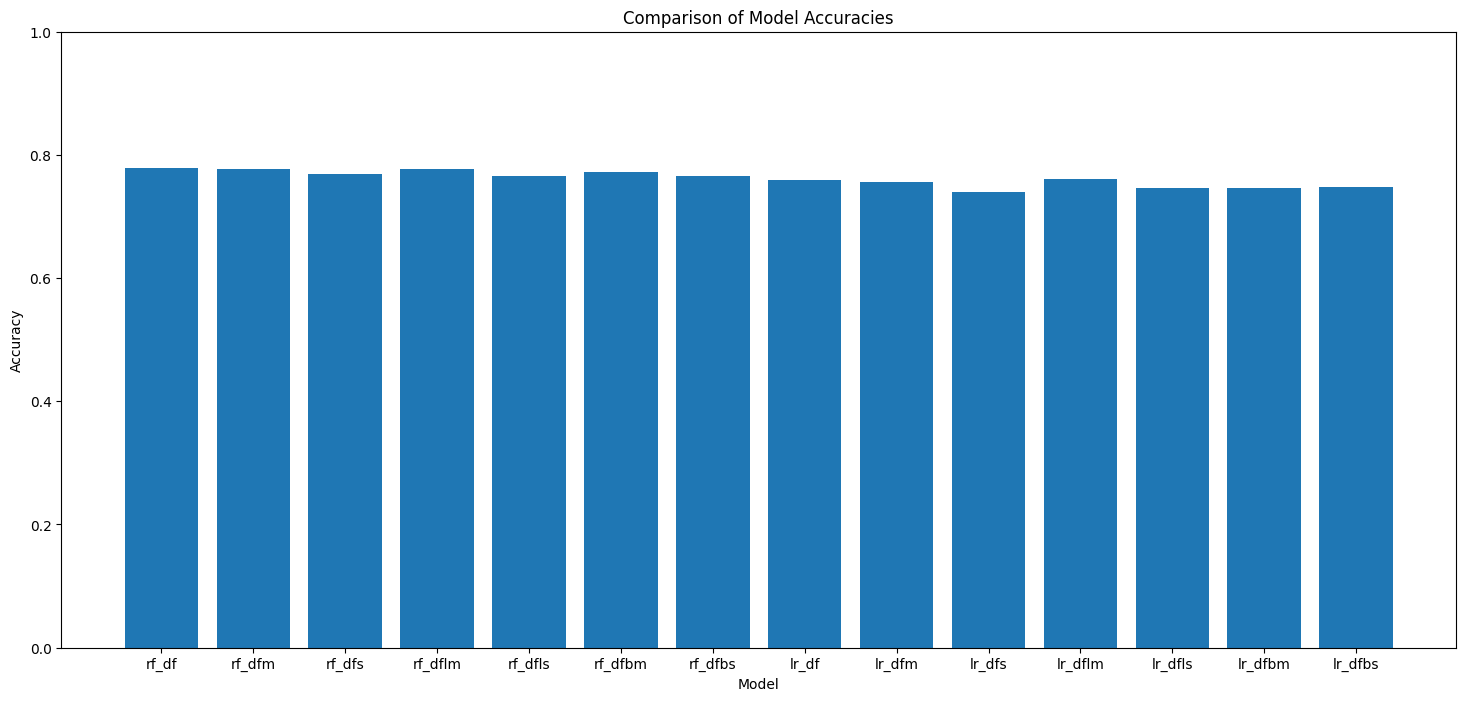

In [98]:
model_accuracies = [accuracy_rf_df, accuracy_rf_dfm,accuracy_rf_dfs, accuracy_rf_dflm,accuracy_rf_dfls, accuracy_rf_dfbm, accuracy_rf_dfbs,
                   accuracy_lr, accuracy_lr_dfm, accuracy_lr_dfs, accuracy_lr_dflm, accuracy_lr_dfls, accuracy_lr_dfbm, accuracy_lr_dfbs] #accuracy_xgb_dfbs ]
model_names = ["rf_df", "rf_dfm","rf_dfs" , "rf_dflm", "rf_dfls" , "rf_dfbm", "rf_dfbs",
                   "lr_df", "lr_dfm", "lr_dfs", "lr_dflm", "lr_dfls", "lr_dfbm", "lr_dfbs"] # "xgb_dfbs" ]

plt.figure(figsize=(18, 8))
plt.bar(model_names, model_accuracies)
plt.ylim(0, 1)
plt.title('Comparison of Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

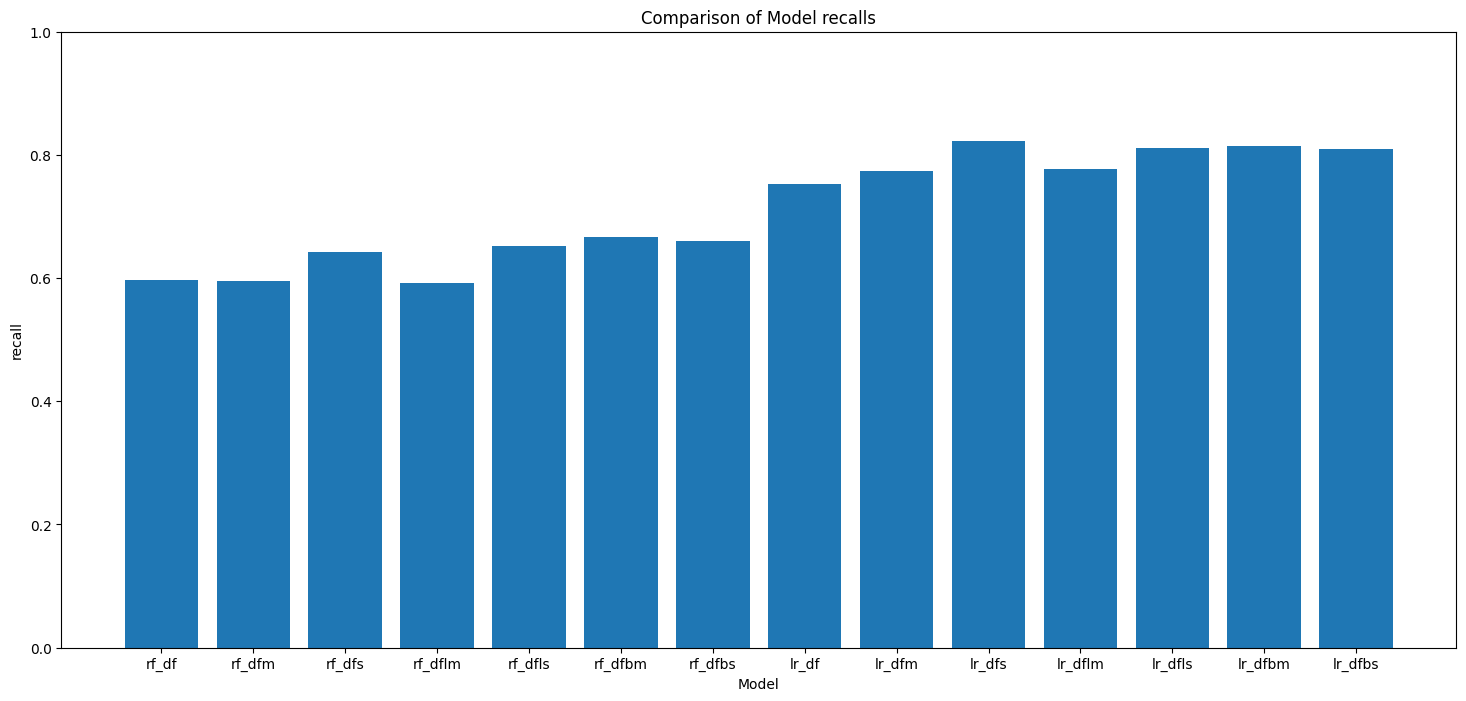

In [99]:
model_recalls = [recall_rf_df, recall_rf_dfm,recall_rf_dfs, recall_rf_dflm,recall_rf_dfls, recall_rf_dfbm, recall_rf_dfbs,
                   recall_lr, recall_lr_dfm, recall_lr_dfs, recall_lr_dflm, recall_lr_dfls, recall_lr_dfbm, recall_lr_dfbs] #recall_xgb_dfbs ]
model_names = ["rf_df", "rf_dfm","rf_dfs" , "rf_dflm", "rf_dfls" , "rf_dfbm", "rf_dfbs",
                   "lr_df", "lr_dfm", "lr_dfs", "lr_dflm", "lr_dfls", "lr_dfbm", "lr_dfbs"] # "xgb_dfbs" ]

plt.figure(figsize=(18, 8))
plt.bar(model_names, model_recalls)
plt.ylim(0, 1)
plt.title('Comparison of Model recalls')
plt.xlabel('Model')
plt.ylabel('recall')
plt.show()

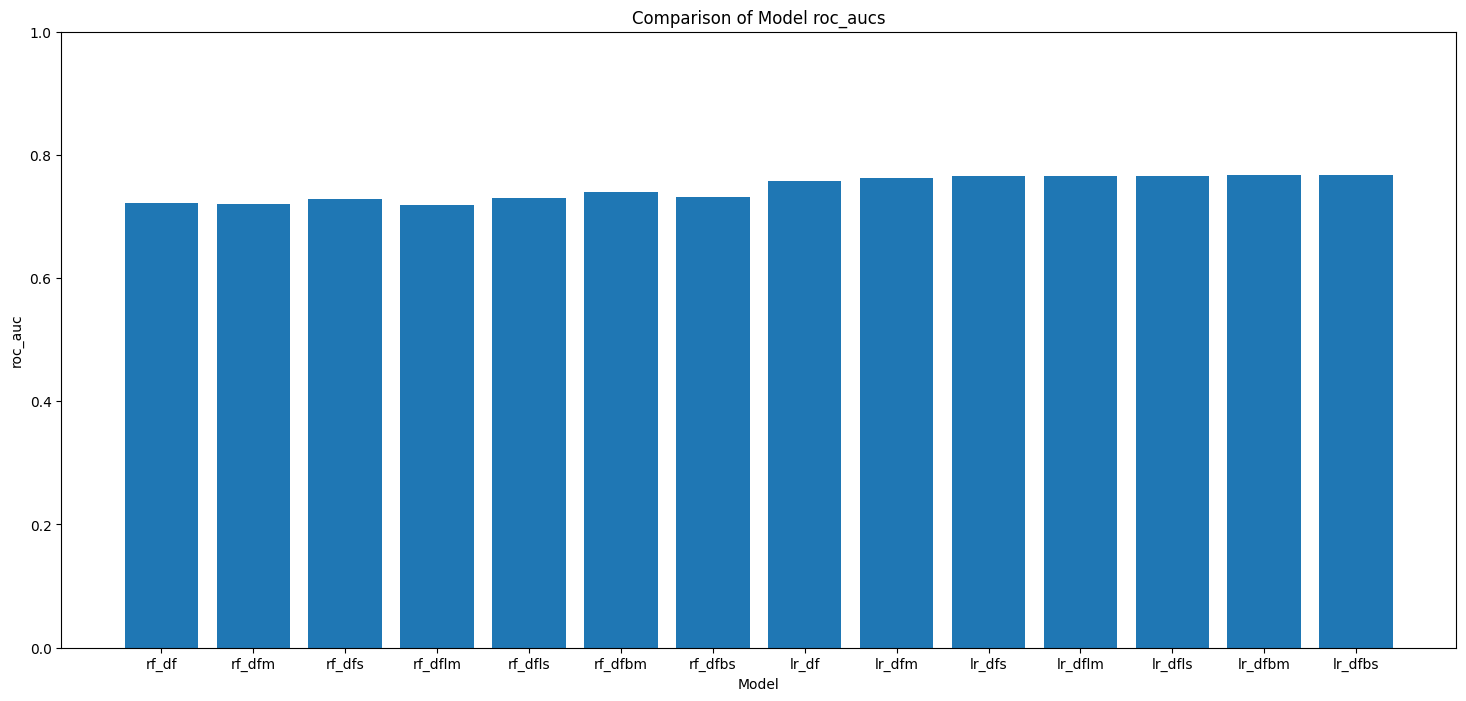

In [100]:
model_roc_aucs = [roc_auc_rf_df, roc_auc_rf_dfm,roc_auc_rf_dfs, roc_auc_rf_dflm,roc_auc_rf_dfls, roc_auc_rf_dfbm, roc_auc_rf_dfbs,
                   roc_auc_lr_df, roc_auc_lr_dfm, roc_auc_lr_dfs, roc_auc_lr_dflm, roc_auc_lr_dfls, roc_auc_lr_dfbm, roc_auc_lr_dfbs] #roc_auc_xgb_dfbs ]
model_names = ["rf_df", "rf_dfm","rf_dfs" , "rf_dflm", "rf_dfls" , "rf_dfbm", "rf_dfbs",
                   "lr_df", "lr_dfm", "lr_dfs", "lr_dflm", "lr_dfls", "lr_dfbm", "lr_dfbs"] # "xgb_dfbs" ]

plt.figure(figsize=(18, 8))
plt.bar(model_names, model_roc_aucs)
plt.ylim(0, 1)
plt.title('Comparison of Model roc_aucs')
plt.xlabel('Model')
plt.ylabel('roc_auc')
plt.show()

### Using GridSearchCV

In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a Random Forest classifier

# Create the GridSearchCV object
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the GridSearchCV object on the training data
grid_search_rf.fit(X_train, y_train)

# Get the best estimator
best_rf = grid_search_rf.best_estimator_

# Predict on the test data using the best estimator
preds_rf_dfbs_gr = best_rf.predict(X_test)

# Evaluate the performance
accuracy_rf_dfbs_gr = accuracy_score(y_test, preds_rf_dfbs_gr)
print(f'Accuracy: {accuracy_rf_dfbs_gr:.2f}')

# Compute confusion matrix
conf_matrix_rf_dfbs_gr = confusion_matrix(y_test, preds_rf_dfbs_gr)
print('Confusion Matrix:')
print(conf_matrix_rf_dfbs_gr)

classification_report_gr = classification_report(y_test, preds_rf_dfbs_gr)
print(f'classification report:',classification_report_gr)

# Compute precision and recall
precision_rf_dfbs_gr = precision_score(y_test, preds_rf_dfbs_gr, average='binary')
recall_rf_dfbs_gr = recall_score(y_test, preds_rf_dfbs_gr)
print(f'Precision Score: {precision_rf_dfbs_gr:.2f}')
print(f'Recall Score: {recall_rf_dfbs_gr:.2f}')


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Accuracy: 0.78
Confusion Matrix:
[[1433  264]
 [ 251  377]]
classification report:               precision    recall  f1-score   support

           0       0.85      0.84      0.85      1697
           1       0.59      0.60      0.59       628

    accuracy                           0.78      2325
   macro avg       0.72      0.72      0.72      2325
weighted avg       0.78      0.78      0.78      2325

Precision Score: 0.59
Recall Score: 0.60


for dfbs

Accuracy: 0.76

Confusion Matrix:
[[1352  345]

 [ 204  424]]
 
Precision Score: 0.55

Recall Score: 0.68


we can see a slight increase in recall score from 0.68 to 0.69 and accuracy from 0.76 to 0.77

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200, 300]
}


grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_lr = grid_search.best_estimator_

preds_lr_dfbs_gr = best_lr.predict(X_test)

accuracy_lr_dfbs_gr = accuracy_score(y_test, preds_lr_dfbs_gr)
print(f'Accuracy: {accuracy_lr_dfbs_gr:.2f}')

conf_matrix_lr_dfbs_gr = confusion_matrix(y_test, preds_lr_dfbs_gr)
print('Confusion Matrix:')
print(conf_matrix_lr_dfbs_gr)

classification_report_gr1 = classification_report(y_test, preds_lr_dfbs_gr)
print(f'classification report:',classification_report_gr1)

precision_lr_dfbs_gr = precision_score(y_test, preds_lr_dfbs_gr, average='binary')  
recall_lr_dfbs_gr = recall_score(y_test, preds_lr_dfbs_gr)
print(f'Precision Score: {precision_lr_dfbs_gr:.2f}')
print(f'Recall Score: {recall_lr_dfbs_gr:.2f}')


C:\Users\Srinidhi\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Srinidhi\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

Accuracy: 0.75
Confusion Matrix:
[[1264  433]
 [ 137  491]]
classification report:               precision    recall  f1-score   support

           0       0.90      0.74      0.82      1697
           1       0.53      0.78      0.63       628

    accuracy                           0.75      2325
   macro avg       0.72      0.76      0.72      2325
weighted avg       0.80      0.75      0.77      2325

Precision Score: 0.53
Recall Score: 0.78


for normal dfbs

Accuracy: 0.75

Confusion Matrix:
[[1229  468]

 [ 106  522]]
Precision Score: 0.53

Recall Score: 0.83

We can observe that there is no significant difference in the result in logistic regression with hyper parameter tuning.

GridSearchCV is a tool that helps you find the best settings(hyperparameters) for your machine learning model to make it perform as well as possible.


C:\Users\Srinidhi\anaconda\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Recall Score: 0.8200636942675159
classification report:               precision    recall  f1-score   support

           0       0.91      0.71      0.80      1697
           1       0.51      0.82      0.63       628

    accuracy                           0.74      2325
   macro avg       0.71      0.77      0.72      2325
weighted avg       0.81      0.74      0.76      2325



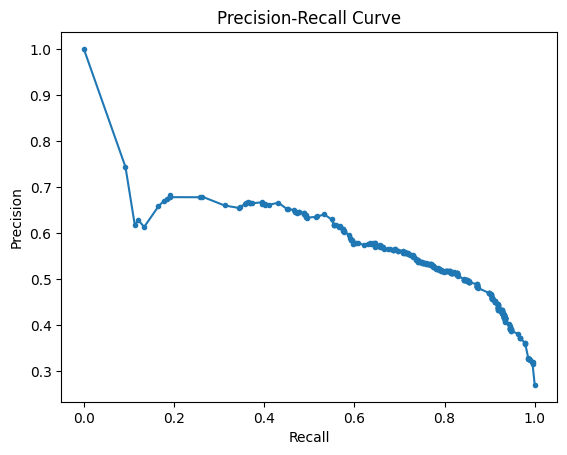

In [103]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import recall_score, precision_recall_curve
import matplotlib.pyplot as plt



# Initialize XGBoost Classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='recall')
grid_search.fit(X_train, y_train)

# Best estimator
best_xgb = grid_search.best_estimator_

# Predict and evaluate
ybs_pred = best_xgb.predict(X_test)
recall_xgb_bs = recall_score(y_test, ybs_pred)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Recall Score: {recall_xgb_bs}")

classification_report_cv1 = classification_report(y_test, ybs_pred)
print(f'classification report:', classification_report_cv1)

# Precision-Recall Curve
ybs_scores = best_xgb.predict_proba(X_test)[:, 1]
precision_xgb_bs, recall_xgb_bs, thresholds_xgb_bs = precision_recall_curve(y_test, ybs_scores)


# Plot Precision-Recall Curve
plt.plot(recall_xgb_bs, precision_xgb_bs, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


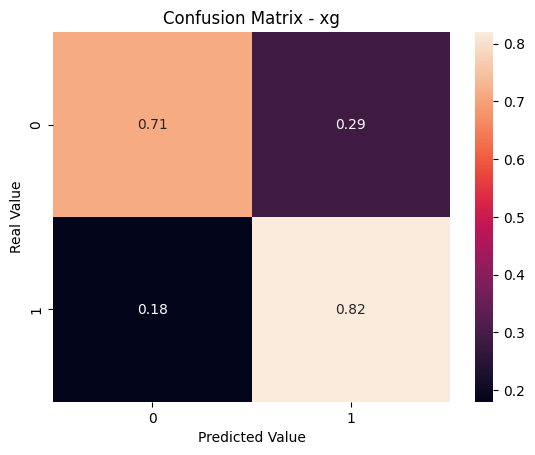

In [122]:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, ybs_pred, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix - xg')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Real Value')

plt.show()

In [105]:
#def predict_churn(input_features):
 
    #prediction = lrbs.predict([input_features])
   # return 'Churn' if prediction[0] == 1 else 'No Churn'


#input_features = [1,0,0,0,0,0,0,0,0,0,0,0.1, 0.1]  # Replace with actual values

#result = predict_churn(input_features)
#print(f'Prediction for the input features: {result}')

In [106]:
import lazypredict 

In [107]:
from lazypredict.Supervised import LazyClassifier

In [109]:
import lazypredict
print(lazypredict.__file__)


C:\Users\Srinidhi\anaconda\lib\site-packages\lazypredict\__init__.py


In [110]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:14<00:00,  2.19it/s]

[LightGBM] [Info] Number of positive: 3477, number of negative: 3477
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000962 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [111]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
QuadraticDiscriminantAnalysis      0.77               0.77     0.77      0.78   
LinearDiscriminantAnalysis         0.75               0.76     0.76      0.76   
RidgeClassifier                    0.75               0.76     0.76      0.76   
RidgeClassifierCV                  0.75               0.76     0.76      0.76   
CalibratedClassifierCV             0.76               0.76     0.76      0.77   
SGDClassifier                      0.76               0.76     0.76      0.77   
LogisticRegression                 0.75               0.76     0.76      0.77   
AdaBoostClassifier                 0.77               0.76     0.76      0.78   
LinearSVC                          0.75               0.76     0.76      0.76   
NuSVC                              0.77               0.76     0.76      0.77   
BernoulliNB                 

Notice that all models yielded similar results. We'll now tune some hyperparameters and use voting classifier on the models to see if we can achieve higher score values. 

In [112]:
from sklearn.metrics import accuracy_score, recall_score, classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

voting_clf = VotingClassifier(
    estimators=[('rf', rf), ('lr', lr), ('xgb', xgb_model)],
    voting='soft' 
)

voting_clf.fit(X_train, y_train)
predictions_v = voting_clf.predict(X_test)
accuracy_v = accuracy_score(y_test, predictions_v)
print(f'Accuracy: {accuracy_v:.2f}')
recall_v = recall_score(y_test, predictions_v, average='macro')  # Use 'micro', 'macro', or 'weighted' for multi-class
print(f'Recall Score (Macro): {recall_v:.2f}')

# Detailed classification report (includes precision, recall, and F1 score)
print('Classification Report:')
print(classification_report(y_test, predictions_v))

Accuracy: 0.79
Recall Score (Macro): 0.76
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1697
           1       0.59      0.68      0.64       628

    accuracy                           0.79      2325
   macro avg       0.73      0.76      0.74      2325
weighted avg       0.80      0.79      0.79      2325



### Using HyperOpt

In [114]:
import numpy as np
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split, cross_val_score

# Assuming Xbs_train, Xbs_test, ybs_train, and ybs_test are already defined

# Define the search space
space = {
    'n_estimators': hp.choice('n_estimators', [50, 100, 200]),
    'max_depth': hp.choice('max_depth', [None, 10, 20, 30]),
    'min_samples_split': hp.choice('min_samples_split', [2, 5, 10]),
    'min_samples_leaf': hp.choice('min_samples_leaf', [1, 2, 4]),
    'bootstrap': hp.choice('bootstrap', [True, False])
}

# Define the objective function
def objective(params):
    rf = RandomForestClassifier(**params)
    # Use cross-validation to evaluate the model
    score = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy').mean()
    return {'loss': -score, 'status': STATUS_OK}

# Run Hyperopt
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)

# Convert the best hyperparameters into the right format
best_params = {
    'n_estimators': [50, 100, 200][best['n_estimators']],
    'max_depth': [None, 10, 20, 30][best['max_depth']],
    'min_samples_split': [2, 5, 10][best['min_samples_split']],
    'min_samples_leaf': [1, 2, 4][best['min_samples_leaf']],
    'bootstrap': [True, False][best['bootstrap']]
}

# Train the best model
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train, y_train)

# Predict on the test data using the best model
preds_rf_dfbs_hy = best_rf.predict(X_test)

# Evaluate the performance
accuracy_rf_dfbs_hy = accuracy_score(y_test, preds_rf_dfbs_hy)
print(f'Accuracy: {accuracy_rf_dfbs_hy:.2f}')

# Compute confusion matrix
conf_matrix_rf_dfbs_hy = confusion_matrix(y_test, preds_rf_dfbs_hy)
print('Confusion Matrix:')
print(conf_matrix_rf_dfbs_hy)

classification_report_hy = classification_report(y_test, preds_rf_dfbs_hy)
print(f'classification report:', classification_report_hy)

# Compute precision and recall
precision_rf_dfbs_hy = precision_score(y_test, preds_rf_dfbs_hy, average='binary')
recall_rf_dfbs_hy = recall_score(y_test, preds_rf_dfbs_hy)
print(f'Precision Score: {precision_rf_dfbs_hy:.2f}')
print(f'Recall Score: {recall_rf_dfbs_hy:.2f}')


100%|███████████████████████████████████████████████| 50/50 [09:25<00:00, 11.32s/trial, best loss: -0.8375104086392999]
Accuracy: 0.78
Confusion Matrix:
[[1426  271]
 [ 239  389]]
classification report:               precision    recall  f1-score   support

           0       0.86      0.84      0.85      1697
           1       0.59      0.62      0.60       628

    accuracy                           0.78      2325
   macro avg       0.72      0.73      0.73      2325
weighted avg       0.78      0.78      0.78      2325

Precision Score: 0.59
Recall Score: 0.62


from the data collected from above when it comes to random forest classifier, we can observe that the model gives better recall score when the X_train and X_test under went minmax scaling and box cx transformation, so let us try and apply hyper parameter tuning to those and see if we could yield a better result

In [118]:
import numpy as np
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split, cross_val_score

# Assuming Xbs_train, Xbs_test, ybs_train, and ybs_test are already defined

# Define the search space
space = {
    'n_estimators': hp.choice('n_estimators', [50, 100, 200]),
    'max_depth': hp.choice('max_depth', [None, 10, 20, 30]),
    'min_samples_split': hp.choice('min_samples_split', [2, 5, 10]),
    'min_samples_leaf': hp.choice('min_samples_leaf', [1, 2, 4]),
    'bootstrap': hp.choice('bootstrap', [True, False])
}

# Define the objective function
def objective(params):
    rf = RandomForestClassifier(**params)
    # Use cross-validation to evaluate the model
    score = cross_val_score(rf, Xmb_train, y_train, cv=5, scoring='accuracy').mean()
    return {'loss': -score, 'status': STATUS_OK}

# Run Hyperopt
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)

# Convert the best hyperparameters into the right format
best_params = {
    'n_estimators': [50, 100, 200][best['n_estimators']],
    'max_depth': [None, 10, 20, 30][best['max_depth']],
    'min_samples_split': [2, 5, 10][best['min_samples_split']],
    'min_samples_leaf': [1, 2, 4][best['min_samples_leaf']],
    'bootstrap': [True, False][best['bootstrap']]
}

# Train the best model
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(Xmb_train, y_train)

# Predict on the test data using the best model
preds_rf_dfbs_hy = best_rf.predict(Xmb_test)

# Evaluate the performance
accuracy_rf_dfbs_hy = accuracy_score(y_test, preds_rf_dfbs_hy)
print(f'Accuracy: {accuracy_rf_dfbs_hy:.2f}')

# Compute confusion matrix
conf_matrix_rf_dfbs_hy = confusion_matrix(y_test, preds_rf_dfbs_hy)
print('Confusion Matrix:')
print(conf_matrix_rf_dfbs_hy)

classification_report_hy = classification_report(y_test, preds_rf_dfbs_hy)
print(f'classification report:', classification_report_hy)

# Compute precision and recall
precision_rf_dfbs_hy = precision_score(y_test, preds_rf_dfbs_hy, average='binary')
recall_rf_dfbs_hy = recall_score(y_test, preds_rf_dfbs_hy)
print(f'Precision Score: {precision_rf_dfbs_hy:.2f}')
print(f'Recall Score: {recall_rf_dfbs_hy:.2f}')


100%|███████████████████████████████████████████████| 50/50 [08:59<00:00, 10.79s/trial, best loss: -0.8379415461160906]
Accuracy: 0.78
Confusion Matrix:
[[1384  313]
 [ 194  434]]
classification report:               precision    recall  f1-score   support

           0       0.88      0.82      0.85      1697
           1       0.58      0.69      0.63       628

    accuracy                           0.78      2325
   macro avg       0.73      0.75      0.74      2325
weighted avg       0.80      0.78      0.79      2325

Precision Score: 0.58
Recall Score: 0.69


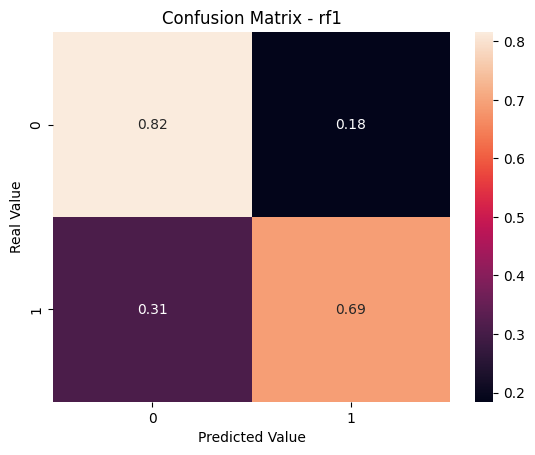

In [124]:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, preds_rf_dfbs_hy, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix - rf1')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Real Value')

plt.show()

we can observe that, as per our prediction the recall and precision values have indeed improved, though by a small margin, but false postive and false negative has decreased by 1% and 2% respectively

In [116]:
import numpy as np
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import cross_val_score

# Define the search space
space = {
    'C': hp.loguniform('C', np.log(0.001), np.log(10)),
    'penalty': hp.choice('penalty', ['l2', None]),
    'solver': hp.choice('solver', ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']),
    'max_iter': hp.choice('max_iter', [100, 200, 300])
}

# Define the objective function
def objective(params):
    # Handle incompatible combinations
    if params['penalty'] is None and params['solver'] == 'liblinear':
        return {'loss': float('inf'), 'status': STATUS_OK}
    
    lr = LogisticRegression(
        C=params['C'],
        penalty=params['penalty'],
        solver=params['solver'],
        max_iter=params['max_iter'],
        random_state=42
    )
    # Use cross-validation to evaluate the model
    score = cross_val_score(lr, X_train, y_train, cv=5, scoring='accuracy').mean()
    return {'loss': -score, 'status': STATUS_OK}

# Run Hyperopt
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)

# Convert the best hyperparameters into the right format
best_params = {
    'C': best['C'],
    'penalty': ['l2', None][best['penalty']],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'][best['solver']],
    'max_iter': [100, 200, 300][best['max_iter']]
}

# Train the best model
best_lr = LogisticRegression(**best_params, random_state=42)
best_lr.fit(X_train, y_train)

# Predict on the test data using the best model
preds_lr_hy = best_lr.predict(X_test)

# Evaluate the performance
accuracy_lr_hy = accuracy_score(y_test, preds_lr_hy)
print(f'Accuracy: {accuracy_lr_hy:.2f}')

# Compute confusion matrix
conf_matrix_lr_hy = confusion_matrix(y_test, preds_lr_hy)
print('Confusion Matrix:')
print(conf_matrix_lr_hy)

classification_report_lrhy = classification_report(y_test, preds_lr_hy)
print(f'classification report:', classification_report_lrhy)

# Compute precision and recall
precision_lr_hy = precision_score(y_test, preds_lr_hy, average='binary')
recall_lr_hy = recall_score(y_test, preds_lr_hy)
print(f'Precision Score: {precision_lr_hy:.2f}')
print(f'Recall Score: {recall_lr_hy:.2f}')


100%|███████████████████████████████████████████████| 50/50 [00:34<00:00,  1.44trial/s, best loss: -0.7993995314172817]
Accuracy: 0.75
Confusion Matrix:
[[1264  433]
 [ 137  491]]
classification report:               precision    recall  f1-score   support

           0       0.90      0.74      0.82      1697
           1       0.53      0.78      0.63       628

    accuracy                           0.75      2325
   macro avg       0.72      0.76      0.72      2325
weighted avg       0.80      0.75      0.77      2325

Precision Score: 0.53
Recall Score: 0.78


from the data collected from above when it comes to logistic regression, we can observe that the model gives better recall score when the X_train and X_test under went through standard scaling (though the difference is very less and the other combination has yielded equally good results),let us try and apply hyper parameter tuning to those and see if we could yield a better result

In [119]:
import numpy as np
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import cross_val_score

# Define the search space
space = {
    'C': hp.loguniform('C', np.log(0.001), np.log(10)),
    'penalty': hp.choice('penalty', ['l2', None]),
    'solver': hp.choice('solver', ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']),
    'max_iter': hp.choice('max_iter', [100, 200, 300])
}

# Define the objective function
def objective(params):
    # Handle incompatible combinations
    if params['penalty'] is None and params['solver'] == 'liblinear':
        return {'loss': float('inf'), 'status': STATUS_OK}
    
    lr = LogisticRegression(
        C=params['C'],
        penalty=params['penalty'],
        solver=params['solver'],
        max_iter=params['max_iter'],
        random_state=42
    )
    # Use cross-validation to evaluate the model
    score = cross_val_score(lr, Xs_train, y_train, cv=5, scoring='accuracy').mean()
    return {'loss': -score, 'status': STATUS_OK}

# Run Hyperopt
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)

# Convert the best hyperparameters into the right format
best_params = {
    'C': best['C'],
    'penalty': ['l2', None][best['penalty']],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'][best['solver']],
    'max_iter': [100, 200, 300][best['max_iter']]
}

# Train the best model
best_lr = LogisticRegression(**best_params, random_state=42)
best_lr.fit(Xs_train, y_train)

# Predict on the test data using the best model
preds_lr_hy = best_lr.predict(Xs_test)

# Evaluate the performance
accuracy_lr_hy = accuracy_score(y_test, preds_lr_hy)
print(f'Accuracy: {accuracy_lr_hy:.2f}')

# Compute confusion matrix
conf_matrix_lr_hy = confusion_matrix(y_test, preds_lr_hy)
print('Confusion Matrix:')
print(conf_matrix_lr_hy)

classification_report_lrhy = classification_report(y_test, preds_lr_hy)
print(f'classification report:', classification_report_lrhy)

# Compute precision and recall
precision_lr_hy = precision_score(y_test, preds_lr_hy, average='binary')
recall_lr_hy = recall_score(y_test, preds_lr_hy)
print(f'Precision Score: {precision_lr_hy:.2f}')
print(f'Recall Score: {recall_lr_hy:.2f}')


100%|███████████████████████████████████████████████| 50/50 [00:10<00:00,  4.86trial/s, best loss: -0.8002625304501187]
Accuracy: 0.74
Confusion Matrix:
[[1202  495]
 [ 110  518]]
classification report:               precision    recall  f1-score   support

           0       0.92      0.71      0.80      1697
           1       0.51      0.82      0.63       628

    accuracy                           0.74      2325
   macro avg       0.71      0.77      0.72      2325
weighted avg       0.81      0.74      0.75      2325

Precision Score: 0.51
Recall Score: 0.82


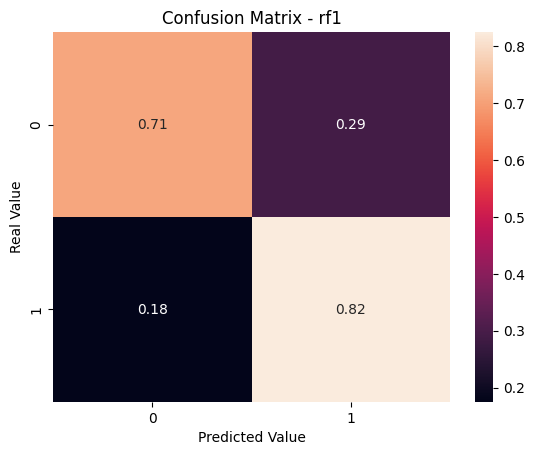

In [125]:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, preds_lr_hy, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix - rf1')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Real Value')

plt.show()

There isn't a significant different with hyper parameter tuning, but it still givs high precision and recall values

### CONCLUSION


The main objective of this article was to build a machine learning algorithm that would be able to identify potential churners and therefore reduce company loss. The best model possible would be the one that could minimize false negatives, identifying all churners among the client base, while also minimizing false positives, preventing clients to be wrongly classified as churned.

Meeting these requirements can be quite tricky as there is a tradeoff between precision and recall, meaning that increasing the value of one of these metrics often decreases the value of the other. Considering the importance of minimizing company loss, we decided to give more emphasis on reducing false positives, searching for the best hyperparameters that could increase the recall rate.

Among the three Gradient Boosting Algorithms tested, XGBoost and logistic regression yielded the best results, with a recall rate of 82% each, although it delivered an undesired 29% of false positives. On the other hand, random forest delivered a better count of false positives, with 18% , but its false negatives were substantially higher than that of XGBoost, resulting in a weaker recall rate.

This article presents a classic evaluation metrics dilemma. In this case, it would be up to the company's decision-makers to analyze the big picture, with the aid of the machine learning algorithms, and decide the best plan to follow. Of course, in a future article, we can test a different approach to achieve a more desirable result.